In [3]:
from pathlib import Path
from typing import Any, Dict, List, Optional

import pandas as pd

import analysis
import config
import pipeline as pipe
import vit.model as model
from head_analysis import run_head_analysis
from main import run_saco_from_pipeline_outputs

pipeline_config = config.PipelineConfig()
pipeline_config.file.use_cached_original = True
pipeline_config.file.current_mode = "test"
pipeline_config.file.weighted = False
pipeline_config.classify.analysis = True

pipeline_config.classify.data_collection = False

original_classification, (
    perturbed_image_records, perturbed_classification) = pipe.run_pipeline(
        pipeline_config,
        source_dir_for_preprocessing=Path(
            f"./COVID-QU-Ex/{pipeline_config.file.current_mode}"))

print("compare attributions")
run_saco_from_pipeline_outputs(pipeline_config, original_classification,
                                perturbed_image_records,
                                perturbed_classification)

# vit = model.load_vit_model()
# direction_similarities, head_importance, token_patterns = run_head_analysis(
#     original_classification,
#     vit,
#     pipeline_config,
#     num_layers_to_analyze=5,
#     importance_threshold=0.2,
#     cls_token_only=False,  # Set to False to analyze all tokens
#     analyze_token_patterns=True,
#     pca_components=10,
#     n_clusters=5
# )

# # If you want to examine the results later
# if token_patterns:
#     for cls_idx, patterns in token_patterns.items():
#         print(f"Class {cls_idx} has {len(patterns['clusters'])} pattern clusters")
        
#         # Print the largest cluster's top token activations
#         largest_cluster = max(patterns['clusters'], key=lambda x: x['size'])
#         print(f"Largest cluster ({largest_cluster['size']} images):")
#         for l, h, t, v in sorted(largest_cluster['top_activations'], key=lambda x: x[3], reverse=True)[:5]:
#             layer_offset = 12 - 5  # Adjust if analyzing different number of layers
#             print(f"  Layer {l+layer_offset}, Head {h}, Token {t}: {v:.5f}")


Using device: cuda
Found 1050 X-ray images
Preprocessing complete. 1050 images saved to results/test/preprocessed
Found 1050 original images for processing.
Loading weights from ./model/model_best.pth.tar
ViT model loaded, hooks registered, and set to eval mode.
Running Classify & Explain for original images


Classifying & Explaining (suffix: ''): 100%|██████████| 1050/1050 [00:00<00:00, 38709.85it/s]

Results saved to results/test/classification_results_originals_explained.csv
Evaluate Faithfulness Pipeline


Settings - n_trials: 3, nr_runs: 100, subset_size: 224
Running estimator: FaithfulnessEstimate
{'abs': False, 'normalise': False, 'return_aggregate': False, 'aggregate_func': <function mean at 0x75c8b82c7b70>, 'normalise_func': <function normalise_by_max at 0x75c818a51e10>, '_disable_warnings': False, '_display_progressbar': True, 'a_axes': None, 'similarity_func': <function correlation_pearson at 0x75c8145413f0>, 'features_in_step': 224, 'perturb_func': functools.partial(<function baseline_replacement_by_indices at 0x75c818a52560>, perturb_baseline='black')}


/home/piragi/projects/gradcamfaithtest/gradcamfaith/.venv/lib/python3.10/site-packages/quantus/helpers/warn.py:257: UserWarning: The settings for perturbing input e.g., 'perturb_func' didn't cause change in input. Reconsider the parameter settings.
  warnings.warn(
1050it [19:00,  1.09s/it]


{'abs': False, 'normalise': False, 'return_aggregate': False, 'aggregate_func': <function mean at 0x75c8b82c7b70>, 'normalise_func': <function normalise_by_max at 0x75c818a51e10>, '_disable_warnings': False, '_display_progressbar': True, 'a_axes': None, 'similarity_func': <function correlation_pearson at 0x75c8145413f0>, 'features_in_step': 224, 'perturb_func': functools.partial(<function baseline_replacement_by_indices at 0x75c818a52560>, perturb_baseline='black')}


1050it [19:03,  1.09s/it]


{'abs': False, 'normalise': False, 'return_aggregate': False, 'aggregate_func': <function mean at 0x75c8b82c7b70>, 'normalise_func': <function normalise_by_max at 0x75c818a51e10>, '_disable_warnings': False, '_display_progressbar': True, 'a_axes': None, 'similarity_func': <function correlation_pearson at 0x75c8145413f0>, 'features_in_step': 224, 'perturb_func': functools.partial(<function baseline_replacement_by_indices at 0x75c818a52560>, perturb_baseline='black')}


1050it [19:02,  1.09s/it]


Running estimator: FaithfulnessCorrelation
{'abs': False, 'normalise': False, 'return_aggregate': False, 'aggregate_func': <function mean at 0x75c8b82c7b70>, 'normalise_func': <function normalise_by_max at 0x75c818a51e10>, '_disable_warnings': False, '_display_progressbar': False, 'a_axes': None, 'similarity_func': <function correlation_pearson at 0x75c8145413f0>, 'nr_runs': 100, 'subset_size': 224, 'perturb_func': functools.partial(<function baseline_replacement_by_indices at 0x75c818a52560>, perturb_baseline='black')}
{'abs': False, 'normalise': False, 'return_aggregate': False, 'aggregate_func': <function mean at 0x75c8b82c7b70>, 'normalise_func': <function normalise_by_max at 0x75c818a51e10>, '_disable_warnings': False, '_display_progressbar': False, 'a_axes': None, 'similarity_func': <function correlation_pearson at 0x75c8145413f0>, 'nr_runs': 100, 'subset_size': 224, 'perturb_func': functools.partial(<function baseline_replacement_by_indices at 0x75c818a52560>, perturb_baseline='

Perturbing dataset: 100%|██████████| 1050/1050 [00:03<00:00, 286.77it/s]


Generated 205800 perturbed image records.
Running Classify ONLY for perturbed images (suffix: '_perturbed')


Classifying dataset (suffix: '_perturbed'): 100%|██████████| 205800/205800 [00:03<00:00, 52190.60it/s]


Results saved to results/test/classification_results_perturbed_classified_only_perturbed.csv
Full pipeline finished.
compare attributions
Building analysis context...
Generating perturbation comparison DataFrame for SaCo...
Generating perturbation comparison data for SaCo...


Processing Perturbations: 100%|██████████| 205800/205800 [00:09<00:00, 22532.40it/s]


Base comparison DataFrame for SaCo saved to results/test/perturbation_comparison_for_saco_perturbed.csv
Running core SaCo calculations...
Average SaCo score for method 'mean': 0.3866 (over 1050 images)
SaCo patch analysis saved to results/test/saco_patch_analysis_mean_perturbed.csv
Analyzing key attribution patterns...
Loading weights from ./model/model_best.pth.tar

OVERALL CORRELATIONS WITH SACO SCORE:

------------------------------------------------------------
CORRELATIONS FOR CLASS: Normal
------------------------------------------------------------

Summary for Normal:
  Total samples: 305
  Mean SaCo score: 0.504
  Median SaCo score: 0.531
  Std SaCo score: 0.167

------------------------------------------------------------
CORRELATIONS FOR CLASS: COVID-19
------------------------------------------------------------

Summary for COVID-19:
  Total samples: 335
  Mean SaCo score: 0.302
  Median SaCo score: 0.321
  Std SaCo score: 0.166

-------------------------------------------

In [ ]:
from pathlib import Path
from typing import Any, Dict, List, Optional

import pandas as pd

import analysis
import config
import pipeline as pipe
import vit.model as model
from head_analysis import run_head_analysis
from main import run_saco_from_pipeline_outputs

pipeline_config = config.PipelineConfig()
pipeline_config.file.use_cached_original = False
pipeline_config.file.current_mode = "test"
pipeline_config.file.weighted = True
pipeline_config.classify.analysis = True

pipeline_config.classify.data_collection = False

original_classification, (
    perturbed_image_records, perturbed_classification) = pipe.run_pipeline(
        pipeline_config,
        source_dir_for_preprocessing=Path(
            f"./COVID-QU-Ex/{pipeline_config.file.current_mode}"))

print("compare attributions")
run_saco_from_pipeline_outputs(pipeline_config, original_classification,
                                perturbed_image_records,
                                perturbed_classification)

# vit = model.load_vit_model()
# direction_similarities, head_importance, token_patterns = run_head_analysis(
#     original_classification,
#     vit,
#     pipeline_config,
#     num_layers_to_analyze=5,
#     importance_threshold=0.2,
#     cls_token_only=False,  # Set to False to analyze all tokens
#     analyze_token_patterns=True,
#     pca_components=10,
#     n_clusters=5
# )

# # If you want to examine the results later
# if token_patterns:
#     for cls_idx, patterns in token_patterns.items():
#         print(f"Class {cls_idx} has {len(patterns['clusters'])} pattern clusters")
        
#         # Print the largest cluster's top token activations
#         largest_cluster = max(patterns['clusters'], key=lambda x: x['size'])
#         print(f"Largest cluster ({largest_cluster['size']} images):")
#         for l, h, t, v in sorted(largest_cluster['top_activations'], key=lambda x: x[3], reverse=True)[:5]:
#             layer_offset = 12 - 5  # Adjust if analyzing different number of layers
#             print(f"  Layer {l+layer_offset}, Head {h}, Token {t}: {v:.5f}")


/home/piragi/projects/gradcamfaithtest/gradcamfaith/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Found 1050 X-ray images
Preprocessing complete. 1050 images saved to results/test/preprocessed
Found 1050 original images for processing.
Loading weights from ./model/model_best.pth.tar
ViT model loaded, hooks registered, and set to eval mode.
Running Classify & Explain for original images


Classifying & Explaining (suffix: ''): 100%|██████████| 1050/1050 [01:56<00:00,  8.98it/s]


Results saved to results/test/classification_results_originals_explained.csv
Evaluate Faithfulness Pipeline
Settings - n_trials: 3, nr_runs: 100, subset_size: 224
Running estimator: FaithfulnessEstimate
{'abs': False, 'normalise': False, 'return_aggregate': False, 'aggregate_func': <function mean at 0x75c8b82c7b70>, 'normalise_func': <function normalise_by_max at 0x75c818a51e10>, '_disable_warnings': False, '_display_progressbar': True, 'a_axes': None, 'similarity_func': <function correlation_pearson at 0x75c8145413f0>, 'features_in_step': 224, 'perturb_func': functools.partial(<function baseline_replacement_by_indices at 0x75c818a52560>, perturb_baseline='black')}


64it [01:09,  1.08s/it]                 /home/piragi/projects/gradcamfaithtest/gradcamfaith/.venv/lib/python3.10/site-packages/quantus/helpers/warn.py:257: UserWarning: The settings for perturbing input e.g., 'perturb_func' didn't cause change in input. Reconsider the parameter settings.
  warnings.warn(
1050it [19:02,  1.09s/it]


{'abs': False, 'normalise': False, 'return_aggregate': False, 'aggregate_func': <function mean at 0x75c8b82c7b70>, 'normalise_func': <function normalise_by_max at 0x75c818a51e10>, '_disable_warnings': False, '_display_progressbar': True, 'a_axes': None, 'similarity_func': <function correlation_pearson at 0x75c8145413f0>, 'features_in_step': 224, 'perturb_func': functools.partial(<function baseline_replacement_by_indices at 0x75c818a52560>, perturb_baseline='black')}


1050it [19:01,  1.09s/it]               


{'abs': False, 'normalise': False, 'return_aggregate': False, 'aggregate_func': <function mean at 0x75c8b82c7b70>, 'normalise_func': <function normalise_by_max at 0x75c818a51e10>, '_disable_warnings': False, '_display_progressbar': True, 'a_axes': None, 'similarity_func': <function correlation_pearson at 0x75c8145413f0>, 'features_in_step': 224, 'perturb_func': functools.partial(<function baseline_replacement_by_indices at 0x75c818a52560>, perturb_baseline='black')}


1050it [19:01,  1.09s/it]               


Running estimator: FaithfulnessCorrelation
{'abs': False, 'normalise': False, 'return_aggregate': False, 'aggregate_func': <function mean at 0x75c8b82c7b70>, 'normalise_func': <function normalise_by_max at 0x75c818a51e10>, '_disable_warnings': False, '_display_progressbar': False, 'a_axes': None, 'similarity_func': <function correlation_pearson at 0x75c8145413f0>, 'nr_runs': 100, 'subset_size': 224, 'perturb_func': functools.partial(<function baseline_replacement_by_indices at 0x75c818a52560>, perturb_baseline='black')}
{'abs': False, 'normalise': False, 'return_aggregate': False, 'aggregate_func': <function mean at 0x75c8b82c7b70>, 'normalise_func': <function normalise_by_max at 0x75c818a51e10>, '_disable_warnings': False, '_display_progressbar': False, 'a_axes': None, 'similarity_func': <function correlation_pearson at 0x75c8145413f0>, 'nr_runs': 100, 'subset_size': 224, 'perturb_func': functools.partial(<function baseline_replacement_by_indices at 0x75c818a52560>, perturb_baseline='

Perturbing dataset: 100%|██████████| 1050/1050 [00:04<00:00, 254.48it/s]


Generated 205800 perturbed image records.
Running Classify ONLY for perturbed images (suffix: '_perturbed')


Classifying dataset (suffix: '_perturbed'): 100%|██████████| 205800/205800 [00:06<00:00, 33349.66it/s]


Results saved to results/test/classification_results_perturbed_classified_only_perturbed.csv
Full pipeline finished.
compare attributions
Building analysis context...
Generating perturbation comparison DataFrame for SaCo...
Generating perturbation comparison data for SaCo...


Processing Perturbations: 100%|██████████| 205800/205800 [00:08<00:00, 23843.40it/s]


Base comparison DataFrame for SaCo saved to results/test/perturbation_comparison_for_saco_perturbed.csv
Running core SaCo calculations...
Average SaCo score for method 'mean': 0.3866 (over 1050 images)
SaCo patch analysis saved to results/test/saco_patch_analysis_mean_perturbed.csv
Analyzing key attribution patterns...
Loading weights from ./model/model_best.pth.tar

OVERALL CORRELATIONS WITH SACO SCORE:

------------------------------------------------------------
CORRELATIONS FOR CLASS: Normal
------------------------------------------------------------

Summary for Normal:
  Total samples: 305
  Mean SaCo score: 0.504
  Median SaCo score: 0.531
  Std SaCo score: 0.167

------------------------------------------------------------
CORRELATIONS FOR CLASS: COVID-19
------------------------------------------------------------

Summary for COVID-19:
  Total samples: 335
  Mean SaCo score: 0.302
  Median SaCo score: 0.321
  Std SaCo score: 0.166

-------------------------------------------

In [ ]:
from pathlib import Path
from typing import Any, Dict, List, Optional

import pandas as pd

import analysis
import config
import pipeline as pipe
import vit.model as model
from head_analysis import run_head_analysis
from main import run_saco_from_pipeline_outputs

pipeline_config = config.PipelineConfig()
pipeline_config.file.use_cached_original = True
pipeline_config.file.current_mode = "test"
pipeline_config.file.weighted = False
pipeline_config.classify.analysis = True

pipeline_config.classify.data_collection = False

original_classification, (
    perturbed_image_records, perturbed_classification) = pipe.run_pipeline(
        pipeline_config,
        source_dir_for_preprocessing=Path(
            f"./COVID-QU-Ex/{pipeline_config.file.current_mode}"))

print("compare attributions")
run_saco_from_pipeline_outputs(pipeline_config, original_classification,
                                perturbed_image_records,
                                perturbed_classification)

# vit = model.load_vit_model()
# direction_similarities, head_importance, token_patterns = run_head_analysis(
#     original_classification,
#     vit,
#     pipeline_config,
#     num_layers_to_analyze=5,
#     importance_threshold=0.2,
#     cls_token_only=False,  # Set to False to analyze all tokens
#     analyze_token_patterns=True,
#     pca_components=10,
#     n_clusters=5
# )

# # If you want to examine the results later
# if token_patterns:
#     for cls_idx, patterns in token_patterns.items():
#         print(f"Class {cls_idx} has {len(patterns['clusters'])} pattern clusters")
        
#         # Print the largest cluster's top token activations
#         largest_cluster = max(patterns['clusters'], key=lambda x: x['size'])
#         print(f"Largest cluster ({largest_cluster['size']} images):")
#         for l, h, t, v in sorted(largest_cluster['top_activations'], key=lambda x: x[3], reverse=True)[:5]:
#             layer_offset = 12 - 5  # Adjust if analyzing different number of layers
#             print(f"  Layer {l+layer_offset}, Head {h}, Token {t}: {v:.5f}")


/home/piragi/projects/gradcamfaithtest/gradcamfaith/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Found 700 X-ray images
Preprocessing complete. 700 images saved to results/test/preprocessed
Found 700 original images for processing.
Loading weights from ./model/model_best.pth.tar
ViT model loaded, hooks registered, and set to eval mode.
Running Classify & Explain for original images


Classifying & Explaining (suffix: ''): 100%|██████████| 700/700 [00:00<00:00, 5286.99it/s]

Results saved to results/test/classification_results_originals_explained.csv
Evaluate Faithfulness Pipeline


Settings - n_trials: 3, nr_runs: 100, subset_size: 224
Running estimator: FaithfulnessCorrelation
{'abs': False, 'normalise': False, 'return_aggregate': False, 'aggregate_func': <function mean at 0x73e5f84bfcb0>, 'normalise_func': <function normalise_by_max at 0x73e55943de10>, '_disable_warnings': False, '_display_progressbar': False, 'a_axes': None, 'similarity_func': <function correlation_pearson at 0x73e554f2d3f0>, 'nr_runs': 100, 'subset_size': 224, 'perturb_func': functools.partial(<function baseline_replacement_by_indices at 0x73e55943e560>, perturb_baseline='black')}
{'abs': False, 'normalise': False, 'return_aggregate': False, 'aggregate_func': <function mean at 0x73e5f84bfcb0>, 'normalise_func': <function normalise_by_max at 0x73e55943de10>, '_disable_warnings': False, '_display_progressbar': False, 'a_axes': None, 'similarity_func': <function correlation_pearson at 0x73e554f2d3f0>, 'nr_runs': 100, 'subset_size': 224, 'perturb_func': functools.partial(<function baseline_replac

Perturbing dataset: 100%|██████████| 700/700 [00:02<00:00, 260.99it/s]


Generated 137200 perturbed image records.
Running Classify ONLY for perturbed images (suffix: '_perturbed')


Classifying dataset (suffix: '_perturbed'): 100%|██████████| 137200/137200 [00:05<00:00, 26429.28it/s]


Results saved to results/test/classification_results_perturbed_classified_only_perturbed.csv
Full pipeline finished.
compare attributions
Building analysis context...
Generating perturbation comparison DataFrame for SaCo...
Generating perturbation comparison data for SaCo...


Processing Perturbations: 100%|██████████| 137200/137200 [00:05<00:00, 23657.20it/s]


Base comparison DataFrame for SaCo saved to results/test/perturbation_comparison_for_saco_perturbed.csv
Running core SaCo calculations...
Average SaCo score for method 'mean': 0.4304 (over 700 images)
SaCo patch analysis saved to results/test/saco_patch_analysis_mean_perturbed.csv
Analyzing key attribution patterns...
Loading weights from ./model/model_best.pth.tar

OVERALL CORRELATIONS WITH SACO SCORE:

------------------------------------------------------------
CORRELATIONS FOR CLASS: Normal
------------------------------------------------------------

Summary for Normal:
  Total samples: 305
  Mean SaCo score: 0.504
  Median SaCo score: 0.531
  Std SaCo score: 0.167

------------------------------------------------------------
CORRELATIONS FOR CLASS: Non-COVID
------------------------------------------------------------

Summary for Non-COVID:
  Total samples: 331
  Mean SaCo score: 0.371
  Median SaCo score: 0.382
  Std SaCo score: 0.189
Saving analysis results...
Saved perturbati

In [ ]:
from pathlib import Path
from typing import Any, Dict, List, Optional

import pandas as pd

import analysis
import config
import pipeline as pipe
import vit.model as model
from head_analysis import run_head_analysis
from main import run_saco_from_pipeline_outputs

pipeline_config = config.PipelineConfig()
pipeline_config.file.use_cached_original = True
pipeline_config.file.current_mode = "test"
pipeline_config.file.weighted = True
pipeline_config.classify.analysis = True

pipeline_config.classify.data_collection = False

original_classification, (
    perturbed_image_records, perturbed_classification) = pipe.run_pipeline(
        pipeline_config,
        source_dir_for_preprocessing=Path(
            f"./COVID-QU-Ex/{pipeline_config.file.current_mode}"))

print("compare attributions")
run_saco_from_pipeline_outputs(pipeline_config, original_classification,
                                perturbed_image_records,
                                perturbed_classification)

# vit = model.load_vit_model()
# direction_similarities, head_importance, token_patterns = run_head_analysis(
#     original_classification,
#     vit,
#     pipeline_config,
#     num_layers_to_analyze=5,
#     importance_threshold=0.2,
#     cls_token_only=False,  # Set to False to analyze all tokens
#     analyze_token_patterns=True,
#     pca_components=10,
#     n_clusters=5
# )

# # If you want to examine the results later
# if token_patterns:
#     for cls_idx, patterns in token_patterns.items():
#         print(f"Class {cls_idx} has {len(patterns['clusters'])} pattern clusters")
        
#         # Print the largest cluster's top token activations
#         largest_cluster = max(patterns['clusters'], key=lambda x: x['size'])
#         print(f"Largest cluster ({largest_cluster['size']} images):")
#         for l, h, t, v in sorted(largest_cluster['top_activations'], key=lambda x: x[3], reverse=True)[:5]:
#             layer_offset = 12 - 5  # Adjust if analyzing different number of layers
#             print(f"  Layer {l+layer_offset}, Head {h}, Token {t}: {v:.5f}")


/home/piragi/projects/gradcamfaithtest/gradcamfaith/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Found 700 X-ray images
Preprocessing complete. 700 images saved to results/test/preprocessed
Found 700 original images for processing.
Loading weights from ./model/model_best.pth.tar
ViT model loaded, hooks registered, and set to eval mode.
Running Classify & Explain for original images


Classifying & Explaining (suffix: ''): 100%|██████████| 700/700 [00:00<00:00, 39120.24it/s]

Results saved to results/test_weighted/classification_results_originals_explained.csv
Evaluate Faithfulness Pipeline


In [2]:
def print_token_patterns(token_patterns, num_layers_to_analyze=5, model_n_layers=12, top_k=5):
    """
    Print detailed information about token activation patterns for all classes.
    
    Args:
        token_patterns: The token patterns dictionary returned by run_head_analysis
        num_layers_to_analyze: Number of layers analyzed
        model_n_layers: Total number of layers in the model
        top_k: Number of top activations to print per cluster
    """
    if not token_patterns:
        print("No token patterns to display.")
        return
    
    layer_offset = model_n_layers - num_layers_to_analyze
    
    for cls_idx, patterns in token_patterns.items():
        print("\n" + "="*60)
        print(f"CLASS {cls_idx} TOKEN ACTIVATION PATTERNS")
        print("="*60)
        print(f"Total images analyzed: {patterns['n_images']}")
        print(f"Number of clusters: {len(patterns['clusters'])}")
        print(f"PCA explained variance: {sum(patterns['explained_variance']):.4f}")
        
        for i, cluster in enumerate(patterns['clusters']):
            print("\n" + "-"*50)
            print(f"CLUSTER {i+1} ({cluster['size']} images, {cluster['percentage']*100:.1f}%)")
            print("-"*50)
            
            print("Example images:")
            print("  " + ", ".join(cluster['image_examples']))
            
            print("\nTop token activations (Layer, Head, Token, Value):")
            for l, h, t, v in sorted(cluster['top_activations'], key=lambda x: x[3], reverse=True)[:top_k]:
                actual_layer = l + layer_offset
                print(f"  Layer {actual_layer}, Head {h}, Token {t}: {v:.5f}")
                
            # Optional: Include CLS token specifically if it's in top activations
            cls_activations = [act for act in cluster['top_activations'] if act[2] == 0]  # Token 0 is CLS
            if cls_activations:
                print("\nCLS token activations:")
                for l, h, t, v in sorted(cls_activations, key=lambda x: x[3], reverse=True)[:3]:
                    actual_layer = l + layer_offset
                    print(f"  Layer {actual_layer}, Head {h}: {v:.5f}")

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_image(image_path):
  plt.figure()
  plt.axis('off')
  image = Image.open(image_path) 
  plt.imshow(image)

In [5]:
# Print detailed information about all clusters for all classes
print_token_patterns(
    token_patterns, 
    num_layers_to_analyze=5,
    model_n_layers=12,
    top_k=10  # Show top 10 activations per cluster
)


CLASS 0 TOKEN ACTIVATION PATTERNS
Total images analyzed: 1014
Number of clusters: 5
PCA explained variance: 0.5404

--------------------------------------------------
CLUSTER 1 (263 images, 25.9%)
--------------------------------------------------
Example images:
  covid_706, covid_192, covid_490, covid_1380, covid_878

Top token activations (Layer, Head, Token, Value):
  Layer 9, Head 6, Token 0: 0.34098
  Layer 9, Head 6, Token 17: 0.34057
  Layer 9, Head 6, Token 57: 0.34057
  Layer 9, Head 6, Token 65: 0.34048
  Layer 9, Head 6, Token 80: 0.34041
  Layer 9, Head 6, Token 23: 0.34037
  Layer 9, Head 6, Token 13: 0.34034
  Layer 9, Head 6, Token 63: 0.34024
  Layer 9, Head 6, Token 22: 0.34013
  Layer 9, Head 6, Token 26: 0.34011

CLS token activations:
  Layer 9, Head 6: 0.34098

--------------------------------------------------
CLUSTER 2 (85 images, 8.4%)
--------------------------------------------------
Example images:
  covid_228, covid_852, covid_838, covid_445, covid_245

To

Loading weights from ./model/model_best.pth.tar
logits = [[-0.09883571  5.5317917  -5.282995  ]]
class vector of predicted = (768,)
--- Layer: 0
Head: 0
  Raw Dot 1: -0.1392 | Cosine Sim 1: -0.0762
  Raw Dot 2: 0.0103 | Cosine Sim 2: 0.0063
  Raw Dot 3: -0.0624 | Cosine Sim 3: -0.0299
Head: 1
  Raw Dot 1: 0.4258 | Cosine Sim 1: 0.0390
  Raw Dot 2: 2.2314 | Cosine Sim 2: 0.2298
  Raw Dot 3: 1.9726 | Cosine Sim 3: 0.1581
Head: 2
  Raw Dot 1: 1.2653 | Cosine Sim 1: 0.1309
  Raw Dot 2: 1.8071 | Cosine Sim 2: 0.2100
  Raw Dot 3: 2.0173 | Cosine Sim 3: 0.1824
Head: 3
  Raw Dot 1: 1.3346 | Cosine Sim 1: 0.1069
  Raw Dot 2: 0.8791 | Cosine Sim 2: 0.0791
  Raw Dot 3: 1.2113 | Cosine Sim 3: 0.0848
Head: 4
  Raw Dot 1: -0.5764 | Cosine Sim 1: -0.1440
  Raw Dot 2: 0.2228 | Cosine Sim 2: 0.0625
  Raw Dot 3: -0.2168 | Cosine Sim 3: -0.0473
Head: 5
  Raw Dot 1: -0.4257 | Cosine Sim 1: -0.1176
  Raw Dot 2: 0.1113 | Cosine Sim 2: 0.0345
  Raw Dot 3: -0.1477 | Cosine Sim 3: -0.0357
Head: 6
  Raw Dot 1: 

IndexError: index 5 is out of bounds for axis 0 with size 5

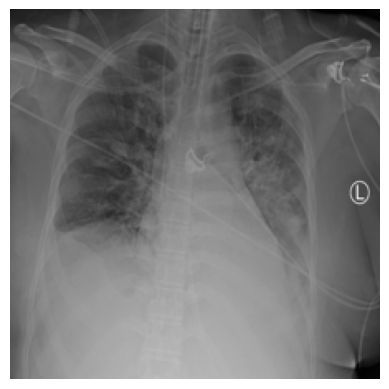

In [8]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

classes = [0, 1, 2]

vit = model.load_vit_model()
classification = original_classification[0]

plot_image(classification.image_path)

logits_path = classification.attribution_paths.logits
logits = np.load(logits_path)
print(f'logits = {logits}')

pred = classification.prediction

class_vector_predicted = vit.head.weight[pred.predicted_class_idx].detach().cpu().numpy()
print(f'class vector of predicted = {class_vector_predicted.shape}')

other_class_indices = [c for c in classes if c != pred.predicted_class_idx]
class_vector_other1 = vit.head.weight[other_class_indices[0]].detach().cpu().numpy()
class_vector_other2 = vit.head.weight[other_class_indices[1]].detach().cpu().numpy()

# Calculate decision boundaries between classes
direction1 = class_vector_predicted - class_vector_other1
direction2 = class_vector_predicted - class_vector_other2
direction3 = class_vector_predicted - 1.0*(class_vector_other1 + class_vector_other2)

# Normalize the direction vectors
norm_direction1 = direction1 / np.linalg.norm(direction1)
norm_direction2 = direction2 / np.linalg.norm(direction2)
norm_direction3 = direction3 / np.linalg.norm(direction3)

# Initialize arrays to store results
num_layers = 12
num_heads = 12
# Create individual arrays for each metric
raw_dots1 = np.zeros((num_layers, num_heads))
raw_dots2 = np.zeros((num_layers, num_heads))
raw_dots3 = np.zeros((num_layers, num_heads))
cos_sims1 = np.zeros((num_layers, num_heads))
cos_sims2 = np.zeros((num_layers, num_heads))
cos_sims3 = np.zeros((num_layers, num_heads))

head_contributions_layers = np.load(classification.attribution_paths.head_contribution_path, allow_pickle=True)

for i in range(num_layers):
    head_contributions = head_contributions_layers[i]
    print(f'--- Layer: {i}')
    
    for j in range(num_heads):
        head_contribution = head_contributions["activity_data"][j, :, :].squeeze(0)
        
        # Get CLS token and ensure it's 1D
        cls_contribution = head_contribution[0]  # CLS token contribution
        if cls_contribution.ndim > 1:
            cls_contribution = cls_contribution.flatten()
        
        # Skip if contribution is all zeros
        if np.all(cls_contribution == 0):
            continue
            
        # Normalize the contribution vector
        cls_norm = np.linalg.norm(cls_contribution)
        norm_cls_contribution = cls_contribution / cls_norm if cls_norm > 0 else cls_contribution
        
        # Raw dot products (magnitude information)
        raw_dot1 = float(np.dot(cls_contribution, direction1))  # Ensure scalar
        raw_dot2 = float(np.dot(cls_contribution, direction2))
        raw_dot3 = float(np.dot(cls_contribution, direction3))
        
        # Cosine similarities (angle information)
        cos_sim1 = float(np.dot(norm_cls_contribution, norm_direction1))
        cos_sim2 = float(np.dot(norm_cls_contribution, norm_direction2))
        cos_sim3 = float(np.dot(norm_cls_contribution, norm_direction3))
        
        # Store results in separate arrays
        raw_dots1[i, j] = raw_dot1
        raw_dots2[i, j] = raw_dot2
        raw_dots3[i, j] = raw_dot3
        cos_sims1[i, j] = cos_sim1
        cos_sims2[i, j] = cos_sim2
        cos_sims3[i, j] = cos_sim3
        
        print(f'Head: {j}')
        print(f'  Raw Dot 1: {raw_dot1:.4f} | Cosine Sim 1: {cos_sim1:.4f}')
        print(f'  Raw Dot 2: {raw_dot2:.4f} | Cosine Sim 2: {cos_sim2:.4f}')
        print(f'  Raw Dot 3: {raw_dot3:.4f} | Cosine Sim 3: {cos_sim3:.4f}')

# Visualize the cosine similarities for the last two layers
plt.figure(figsize=(15, 6))

# Focus on last two layers
plot_layers = [8,9, 10, 11]
metrics = ['Cosine Similarity with Direction 1', 
           'Cosine Similarity with Direction 2',
           'Cosine Similarity with Direction 3']
           
cos_sims = [cos_sims1, cos_sims2, cos_sims3]

for idx, cos_sim in enumerate(cos_sims):
    plt.subplot(1, 3, idx+1)
    data = np.zeros((len(plot_layers), num_heads))
    
    for i, layer in enumerate(plot_layers):
        data[i] = cos_sim[layer, :]
    
    sns.heatmap(data, annot=True, fmt=".2f", cmap="RdBu_r", center=0,
                xticklabels=range(num_heads-1), 
                yticklabels=[f'Layer {i}' for i in plot_layers])
    
    plt.title(metrics[idx])
    plt.xlabel('Head')
    plt.ylabel('Layer')

plt.tight_layout()
plt.show()

In [1]:
"""
Head Analysis Visualization Module
Generates comprehensive visualizations for ViT head analysis research
"""

import os
from pathlib import Path
from typing import Dict, List, Optional, Tuple

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib.cm import get_cmap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd


class HeadAnalysisVisualizer:
    """Comprehensive visualization suite for head analysis results."""
    
    def __init__(self, save_dir: Path, class_names: Dict[int, str] = None):
        """
        Initialize visualizer.
        
        Args:
            save_dir: Directory to save visualizations
            class_names: Mapping of class indices to names (default: {0: 'Covid', 1: 'Non-Covid', 2: 'Normal'})
        """
        self.save_dir = save_dir
        self.viz_dir = save_dir / "visualizations"
        os.makedirs(self.viz_dir, exist_ok=True)
        
        self.class_names = class_names or {
            0: 'Covid',
            1: 'Non-Covid', 
            2: 'Normal'
        }
        self.class_colors = {
            0: '#FF6B6B',  # Red for Covid
            1: '#4ECDC4',  # Teal for Non-Covid
            2: '#45B7D1'   # Blue for Normal
        }
        
        # Set matplotlib style
        plt.style.use('seaborn-v0_8-darkgrid')
        sns.set_palette("husl")
        
        self.descriptions = {}
        
    def generate_all_visualizations(self, 
                                  direction_similarities: Dict,
                                  head_importance: Dict,
                                  token_patterns: Dict,
                                  num_layers: int = 5,
                                  start_layer: int = 7):
        """Generate all visualizations and descriptions."""
        
        print("Generating comprehensive visualizations...")
        
        # 1. Head Importance Heatmaps
        self._visualize_head_importance(head_importance, num_layers, start_layer)
        
        # 2. Similarity Distribution Analysis
        self._visualize_similarity_distributions(direction_similarities)
        
        # 3. Top Contributing Heads Comparison
        self._visualize_top_heads_comparison(head_importance, start_layer)
        
        # 4. Token Pattern Analysis (PCA/Clustering)
        self._visualize_token_patterns(token_patterns, start_layer)
        
        # 5. Class-wise Head Activation Patterns
        self._visualize_class_activation_patterns(direction_similarities, num_layers)
        
        # 6. Statistical Summary Tables
        self._generate_summary_tables(head_importance, token_patterns)
        
        # 7. Inter-class Head Specialization
        self._visualize_head_specialization(head_importance, num_layers, start_layer)
        
        # 8. Layer-wise Importance Progression
        self._visualize_layer_progression(head_importance, num_layers, start_layer)
        
        # Save descriptions
        self._save_descriptions()
        
        print(f"All visualizations saved to {self.viz_dir}")
        
    def _visualize_head_importance(self, head_importance: Dict, num_layers: int, start_layer: int):
        """Create heatmaps showing head importance for each class."""
        
        fig = plt.figure(figsize=(20, 8))
        gs = gridspec.GridSpec(1, 3, figure=fig, wspace=0.3)
        
        importance_data = head_importance['class_head_importance']
        
        for class_idx in range(3):
            ax = fig.add_subplot(gs[0, class_idx])
            
            # Create heatmap data
            heatmap_data = importance_data[class_idx]
            
            # Create custom colormap
            colors = ['white', self.class_colors[class_idx]]
            n_bins = 100
            cmap = sns.blend_palette(colors, as_cmap=True)
            
            # Plot heatmap
            im = ax.imshow(heatmap_data, cmap=cmap, aspect='auto', vmin=0, vmax=1)
            
            # Customize axes
            ax.set_xlabel('Head Index', fontsize=12, fontweight='bold')
            ax.set_ylabel('Layer', fontsize=12, fontweight='bold')
            ax.set_title(f'{self.class_names[class_idx]} Head Importance', 
                        fontsize=14, fontweight='bold', pad=10)
            
            # Set ticks
            ax.set_xticks(range(12))
            ax.set_yticks(range(num_layers))
            ax.set_yticklabels([f'L{start_layer + i}' for i in range(num_layers)])
            
            # Add colorbar
            cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
            cbar.set_label('Importance Score', fontsize=10)
            
            # Add grid
            ax.set_xticks(np.arange(12) - 0.5, minor=True)
            ax.set_yticks(np.arange(num_layers) - 0.5, minor=True)
            ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
            
            # Highlight most important heads
            threshold = 0.5
            for i in range(num_layers):
                for j in range(12):
                    if heatmap_data[i, j] > threshold:
                        rect = Rectangle((j-0.45, i-0.45), 0.9, 0.9, 
                                       linewidth=2, edgecolor='black', 
                                       facecolor='none', linestyle='--')
                        ax.add_patch(rect)
        
        plt.suptitle('Head Importance Analysis Across Classes', fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.savefig(self.viz_dir / 'head_importance_heatmaps.png', dpi=300, bbox_inches='tight')
        plt.close()
        
        self.descriptions['head_importance_heatmaps'] = """
**Head Importance Heatmaps**

These heatmaps visualize the importance of each attention head in the last 5 layers of the ViT model for each class prediction. The importance score (0-1) indicates how frequently a head contributes significantly to the class direction vector.

Key insights:
- Darker colors indicate heads that are more important for the respective class
- Dashed boxes highlight heads with >50% importance score
- Different classes show distinct patterns of head specialization
- Later layers tend to show more class-specific specialization

This visualization helps identify which attention heads are most critical for each class prediction, suggesting potential head pruning strategies or interpretation focal points.
"""

    def _visualize_similarity_distributions(self, direction_similarities: Dict):
        """Visualize distribution of similarity scores across classes."""
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()
        
        # Collect similarities by class
        class_similarities = {0: [], 1: [], 2: []}
        all_similarities = []
        
        for img_data in direction_similarities.values():
            class_idx = img_data['predicted_class']
            similarities = img_data['similarities']['all'].flatten()
            class_similarities[class_idx].extend(similarities)
            all_similarities.extend(similarities)
        
        # Plot 1: Overall distribution
        ax = axes[0]
        ax.hist(all_similarities, bins=50, alpha=0.7, color='gray', edgecolor='black')
        ax.axvline(np.mean(all_similarities), color='red', linestyle='--', 
                  label=f'Mean: {np.mean(all_similarities):.3f}')
        ax.axvline(np.median(all_similarities), color='blue', linestyle='--', 
                  label=f'Median: {np.median(all_similarities):.3f}')
        ax.set_xlabel('Cosine Similarity', fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
        ax.set_title('Overall Similarity Distribution', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Plots 2-4: Class-specific distributions
        for idx, class_idx in enumerate([0, 1, 2]):
            ax = axes[idx + 1]
            similarities = class_similarities[class_idx]
            
            if similarities:
                ax.hist(similarities, bins=50, alpha=0.7, 
                       color=self.class_colors[class_idx], edgecolor='black')
                ax.axvline(np.mean(similarities), color='red', linestyle='--', 
                          label=f'Mean: {np.mean(similarities):.3f}')
                ax.set_xlabel('Cosine Similarity', fontsize=12)
                ax.set_ylabel('Frequency', fontsize=12)
                ax.set_title(f'{self.class_names[class_idx]} Similarity Distribution', 
                           fontsize=14, fontweight='bold')
                ax.legend()
                ax.grid(True, alpha=0.3)
        
        plt.suptitle('Cosine Similarity Distributions by Class', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig(self.viz_dir / 'similarity_distributions.png', dpi=300, bbox_inches='tight')
        plt.close()
        
        self.descriptions['similarity_distributions'] = """
**Similarity Distribution Analysis**

These histograms show the distribution of cosine similarity scores between head outputs and class direction vectors. The analysis includes both overall distribution and class-specific breakdowns.

Key observations:
- The overall distribution shows the general alignment pattern across all classes
- Class-specific distributions reveal unique activation patterns for each diagnosis
- Mean and median lines indicate central tendencies
- Distribution shape indicates consistency of head contributions

This analysis helps understand:
1. How consistently heads align with class directions
2. Whether certain classes have more focused or dispersed attention patterns
3. The threshold selection for determining "important" heads
"""

    def _visualize_top_heads_comparison(self, head_importance: Dict, start_layer: int):
        """Create comparative visualization of top contributing heads."""
        
        fig, ax = plt.subplots(figsize=(14, 8))
        
        # Extract top heads for each class
        top_heads_data = []
        for class_idx in range(3):
            ranked_heads = head_importance['class_ranked_heads'][class_idx][:10]
            for rank, (layer, head, score) in enumerate(ranked_heads):
                top_heads_data.append({
                    'Class': self.class_names[class_idx],
                    'Layer': start_layer + layer,
                    'Head': head,
                    'Score': score,
                    'Rank': rank + 1,
                    'Label': f'L{start_layer + layer}H{head}'
                })
        
        # Create grouped bar plot
        df = pd.DataFrame(top_heads_data)
        
        # Create position for each bar
        class_positions = {name: i for i, name in enumerate(self.class_names.values())}
        x_positions = []
        colors = []
        heights = []
        labels = []
        
        for idx, row in df.iterrows():
            class_pos = class_positions[row['Class']]
            x_pos = class_pos * 11 + row['Rank'] - 1
            x_positions.append(x_pos)
            colors.append(self.class_colors[list(self.class_names.values()).index(row['Class'])])
            heights.append(row['Score'])
            labels.append(row['Label'])
        
        bars = ax.bar(x_positions, heights, color=colors, alpha=0.8, edgecolor='black')
        
        # Add value labels on bars
        for bar, label in zip(bars, labels):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   label, ha='center', va='bottom', fontsize=8, rotation=45)
        
        # Customize plot
        ax.set_xlabel('Top 10 Heads per Class', fontsize=12, fontweight='bold')
        ax.set_ylabel('Importance Score', fontsize=12, fontweight='bold')
        ax.set_title('Top Contributing Heads Comparison Across Classes', 
                    fontsize=14, fontweight='bold')
        
        # Add class labels
        for class_name, pos in class_positions.items():
            ax.text(pos * 11 + 4.5, -0.05, class_name, ha='center', 
                   transform=ax.get_xaxis_transform(), fontsize=12, fontweight='bold')
        
        # Remove x-ticks
        ax.set_xticks([])
        ax.set_ylim(0, max(heights) * 1.2)
        ax.grid(True, axis='y', alpha=0.3)
        
        # Add legend
        legend_elements = [plt.Rectangle((0,0),1,1, fc=self.class_colors[i], 
                                       label=self.class_names[i]) for i in range(3)]
        ax.legend(handles=legend_elements, loc='upper right')
        
        plt.tight_layout()
        plt.savefig(self.viz_dir / 'top_heads_comparison.png', dpi=300, bbox_inches='tight')
        plt.close()
        
        self.descriptions['top_heads_comparison'] = """
**Top Contributing Heads Comparison**

This bar chart compares the top 10 most important attention heads for each class. Each bar represents a specific layer-head combination (e.g., L11H7 = Layer 11, Head 7) with its importance score.

Key findings:
- Each class relies on a distinct set of attention heads
- Some heads may appear in multiple classes but with different importance levels
- Later layers (L10-L11) tend to dominate the top positions
- The importance scores indicate how consistently these heads contribute to correct predictions

This comparison helps identify:
1. Class-specific attention mechanisms
2. Shared vs. unique processing pathways
3. Potential targets for interpretability studies
"""

    def _visualize_token_patterns(self, token_patterns: Dict, start_layer: int):
        """Visualize token activation patterns using PCA/clustering results."""
        
        # Create figure with subplots for each class
        fig = plt.figure(figsize=(20, 6))
        gs = gridspec.GridSpec(1, 3, figure=fig, wspace=0.3)
        
        for idx, (class_idx, patterns) in enumerate(token_patterns.items()):
            ax = fig.add_subplot(gs[0, idx])
            
            # Plot PCA results with clusters
            pca_result = patterns['pca_result']
            cluster_labels = patterns['cluster_labels']
            
            # Create scatter plot
            scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], 
                               c=cluster_labels, cmap='viridis', 
                               s=50, alpha=0.7, edgecolors='black')
            
            # Add cluster centers
            for cluster_info in patterns['clusters']:
                cluster_id = cluster_info['cluster_id']
                cluster_points = pca_result[cluster_labels == cluster_id]
                if len(cluster_points) > 0:
                    center = cluster_points.mean(axis=0)
                    ax.scatter(center[0], center[1], c='red', s=200, 
                             marker='*', edgecolors='black', linewidth=2,
                             label=f'Cluster {cluster_id+1} center')
            
            ax.set_xlabel('PC1', fontsize=12)
            ax.set_ylabel('PC2', fontsize=12)
            ax.set_title(f'{self.class_names[class_idx]} Token Activation Patterns', 
                        fontsize=14, fontweight='bold')
            ax.grid(True, alpha=0.3)
            
            # Add variance explained
            var_explained = sum(patterns['explained_variance'][:2])
            ax.text(0.02, 0.98, f'Variance explained: {var_explained:.2%}',
                   transform=ax.transAxes, va='top', fontsize=10,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        plt.suptitle('Token Activation Pattern Clustering (PCA Visualization)', 
                    fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig(self.viz_dir / 'token_pattern_clustering.png', dpi=300, bbox_inches='tight')
        plt.close()
        
        # Create detailed cluster analysis figure
        self._visualize_cluster_details(token_patterns, start_layer)
        
        self.descriptions['token_pattern_clustering'] = """
**Token Activation Pattern Analysis**

These visualizations show the results of PCA and k-means clustering applied to token activation patterns for each class. Each point represents an image, positioned based on its activation pattern similarity.

Key insights:
- Distinct clusters indicate different activation pattern "modes" within each class
- Cluster centers (red stars) represent prototypical activation patterns
- Variance explained shows how well 2D PCA captures the pattern diversity
- Cluster separation indicates heterogeneity in processing strategies

This analysis reveals:
1. Whether images within a class are processed uniformly or through multiple pathways
2. Potential sub-types within each diagnostic category
3. The complexity of the learned representations
"""

    def _visualize_cluster_details(self, token_patterns: Dict, start_layer: int):
        """Create detailed visualization of cluster characteristics."""
        
        fig, axes = plt.subplots(3, 3, figsize=(18, 15))
        
        for class_idx, patterns in token_patterns.items():
            row_axes = axes[class_idx]
            
            # Plot 1: Cluster sizes
            ax = row_axes[0]
            cluster_sizes = [c['size'] for c in patterns['clusters']]
            cluster_names = [f'C{c["cluster_id"]+1}' for c in patterns['clusters']]
            bars = ax.bar(cluster_names, cluster_sizes, color=self.class_colors[class_idx], 
                          alpha=0.7, edgecolor='black')
            ax.set_xlabel('Cluster', fontsize=10)
            ax.set_ylabel('Number of Images', fontsize=10)
            ax.set_title(f'{self.class_names[class_idx]} - Cluster Sizes', fontsize=12)
            
            # Add percentage labels
            for bar, cluster in zip(bars, patterns['clusters']):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                       f'{cluster["percentage"]*100:.1f}%', 
                       ha='center', va='bottom', fontsize=9)
            
            # Plot 2: Top activations heatmap
            ax = row_axes[1]
            
            # Create activation matrix for top tokens across clusters
            n_clusters = len(patterns['clusters'])
            n_top = 5  # Show top 5 activations per cluster
            activation_matrix = np.zeros((n_clusters, n_top))
            activation_labels = []
            
            for i, cluster in enumerate(patterns['clusters']):
                top_acts = sorted(cluster['top_activations'], 
                                key=lambda x: x[3], reverse=True)[:n_top]
                for j, (l, h, t, v) in enumerate(top_acts):
                    activation_matrix[i, j] = v
                    if i == 0:  # Only create labels once
                        activation_labels.append(f'L{start_layer+l}H{h}T{t}')
            
            im = ax.imshow(activation_matrix, cmap='YlOrRd', aspect='auto')
            ax.set_xticks(range(n_top))
            ax.set_xticklabels(activation_labels, rotation=45, ha='right', fontsize=8)
            ax.set_yticks(range(n_clusters))
            ax.set_yticklabels([f'C{i+1}' for i in range(n_clusters)])
            ax.set_xlabel('Top Activated Positions', fontsize=10)
            ax.set_ylabel('Cluster', fontsize=10)
            ax.set_title(f'{self.class_names[class_idx]} - Top Activations', fontsize=12)
            
            # Add colorbar
            cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
            cbar.ax.tick_params(labelsize=8)
            
            # Plot 3: PCA variance explained
            ax = row_axes[2]
            var_explained = patterns['explained_variance'][:10] * 100
            ax.bar(range(1, len(var_explained)+1), var_explained, 
                  color=self.class_colors[class_idx], alpha=0.7, edgecolor='black')
            ax.set_xlabel('Principal Component', fontsize=10)
            ax.set_ylabel('Variance Explained (%)', fontsize=10)
            ax.set_title(f'{self.class_names[class_idx]} - PCA Variance', fontsize=12)
            ax.set_xticks(range(1, len(var_explained)+1))
            
            # Add cumulative line
            cumsum = np.cumsum(var_explained)
            ax2 = ax.twinx()
            ax2.plot(range(1, len(var_explained)+1), cumsum, 'r-o', 
                    markersize=4, linewidth=2, label='Cumulative')
            ax2.set_ylabel('Cumulative Variance (%)', fontsize=10, color='red')
            ax2.tick_params(axis='y', labelcolor='red')
            ax2.set_ylim(0, 100)
        
        plt.suptitle('Detailed Token Pattern Cluster Analysis', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig(self.viz_dir / 'cluster_details.png', dpi=300, bbox_inches='tight')
        plt.close()
        
        self.descriptions['cluster_details'] = """
**Detailed Cluster Analysis**

This multi-panel visualization provides in-depth analysis of the token activation clusters for each class:

Left panels - Cluster Sizes:
- Shows the distribution of images across clusters
- Percentages indicate the prevalence of each activation pattern

Middle panels - Top Activations:
- Heatmaps show the strongest activated layer-head-token combinations per cluster
- Darker colors indicate stronger activations
- Labels show specific positions (e.g., L11H7T0 = Layer 11, Head 7, Token 0)

Right panels - PCA Variance:
- Bar charts show variance explained by each principal component
- Red line shows cumulative variance
- Indicates the dimensionality of the activation patterns

This detailed view helps understand:
1. The diversity of processing strategies within each class
2. Which specific attention positions are most discriminative
3. The complexity of the learned feature space
"""

    def _visualize_class_activation_patterns(self, direction_similarities: Dict, num_layers: int):
        """Visualize activation patterns across token positions."""
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        # Aggregate activation patterns by class
        for class_idx in range(3):
            ax = axes[class_idx]
            
            # Collect all similarity matrices for this class
            class_similarities = []
            for img_data in direction_similarities.values():
                if img_data['predicted_class'] == class_idx:
                    # Average across layers and heads
                    sim_matrix = img_data['similarities']['all']
                    avg_by_token = np.mean(sim_matrix, axis=(0, 1))  # Average over layers and heads
                    class_similarities.append(avg_by_token)
            
            if class_similarities:
                # Calculate mean and std
                similarities_array = np.array(class_similarities)
                mean_pattern = np.mean(similarities_array, axis=0)
                std_pattern = np.std(similarities_array, axis=0)
                
                # Limit to first 50 tokens for visibility
                n_tokens = min(50, len(mean_pattern))
                x = np.arange(n_tokens)
                
                # Plot with error bars
                ax.bar(x, mean_pattern[:n_tokens], 
                      yerr=std_pattern[:n_tokens],
                      color=self.class_colors[class_idx], 
                      alpha=0.7, edgecolor='black',
                      error_kw={'elinewidth': 1, 'alpha': 0.5})
                
                # Highlight CLS token
                ax.bar(0, mean_pattern[0], color='red', alpha=0.8, 
                      edgecolor='black', linewidth=2, label='CLS Token')
                
                ax.set_xlabel('Token Position', fontsize=12)
                ax.set_ylabel('Mean Similarity Score', fontsize=12)
                ax.set_title(f'{self.class_names[class_idx]} Token Activation Pattern', 
                           fontsize=14, fontweight='bold')
                ax.legend()
                ax.grid(True, axis='y', alpha=0.3)
                
                # Add annotation for top tokens
                top_tokens = np.argsort(mean_pattern[:n_tokens])[-5:]
                for token_idx in top_tokens:
                    if token_idx != 0:  # Skip CLS token as it's already highlighted
                        ax.annotate(f'T{token_idx}', 
                                  xy=(token_idx, mean_pattern[token_idx]),
                                  xytext=(token_idx, mean_pattern[token_idx] + 0.05),
                                  ha='center', fontsize=8)
        
        plt.suptitle('Average Token Activation Patterns by Class', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig(self.viz_dir / 'token_activation_patterns.png', dpi=300, bbox_inches='tight')
        plt.close()
        
        self.descriptions['token_activation_patterns'] = """
**Token Activation Patterns**

These bar charts show the average activation strength across token positions for each class. Error bars indicate standard deviation across images.

Key observations:
- CLS token (position 0, highlighted in red) typically shows strong activation
- Different classes exhibit distinct spatial attention patterns
- Some tokens consistently show high activation across images (annotated)
- Variance (error bars) indicates consistency of the pattern

This visualization reveals:
1. How different classes attend to different spatial regions
2. The importance of the CLS token for classification
3. Whether certain image regions are consistently important for diagnosis
"""

    def _visualize_head_specialization(self, head_importance: Dict, num_layers: int, start_layer: int):
        """Visualize head specialization across classes."""
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Calculate specialization scores
        importance_data = head_importance['class_head_importance']
        
        # Reshape data for analysis
        n_heads_total = num_layers * 12
        head_scores = np.zeros((n_heads_total, 3))
        
        for class_idx in range(3):
            class_importance = importance_data[class_idx].flatten()
            head_scores[:, class_idx] = class_importance
        
        # Calculate specialization metrics
        # 1. Entropy-based specialization (lower = more specialized)
        epsilon = 1e-10
        head_probs = head_scores / (head_scores.sum(axis=1, keepdims=True) + epsilon)
        head_entropy = -np.sum(head_probs * np.log(head_probs + epsilon), axis=1)
        
        # 2. Max-class dominance
        max_class_score = np.max(head_scores, axis=1)
        dominant_class = np.argmax(head_scores, axis=1)
        
        # Plot 1: Specialization heatmap
        specialization_matrix = 1 - (head_entropy / np.log(3))  # Normalize to [0,1]
        specialization_matrix = specialization_matrix.reshape(num_layers, 12)
        
        im1 = ax1.imshow(specialization_matrix, cmap='RdYlBu', aspect='auto', vmin=0, vmax=1)
        ax1.set_xlabel('Head Index', fontsize=12)
        ax1.set_ylabel('Layer', fontsize=12)
        ax1.set_title('Head Specialization Score\n(Blue = Specialized, Red = General)', 
                     fontsize=14, fontweight='bold')
        ax1.set_yticks(range(num_layers))
        ax1.set_yticklabels([f'L{start_layer + i}' for i in range(num_layers)])
        ax1.set_xticks(range(12))
        
        cbar1 = plt.colorbar(im1, ax=ax1)
        cbar1.set_label('Specialization Score', fontsize=10)
        
        # Plot 2: Class assignment
        class_assignment = dominant_class.reshape(num_layers, 12)
        
        # Create custom colormap for classes
        colors_list = [self.class_colors[i] for i in range(3)]
        from matplotlib.colors import ListedColormap
        cmap_classes = ListedColormap(colors_list)
        
        im2 = ax2.imshow(class_assignment, cmap=cmap_classes, aspect='auto', vmin=0, vmax=2)
        ax2.set_xlabel('Head Index', fontsize=12)
        ax2.set_ylabel('Layer', fontsize=12)
        ax2.set_title('Dominant Class per Head', fontsize=14, fontweight='bold')
        ax2.set_yticks(range(num_layers))
        ax2.set_yticklabels([f'L{start_layer + i}' for i in range(num_layers)])
        ax2.set_xticks(range(12))
        
        # Create discrete colorbar
        cbar2 = plt.colorbar(im2, ax=ax2, ticks=[0, 1, 2])
        cbar2.set_ticklabels([self.class_names[i] for i in range(3)])
        
        # Add significance markers for highly specialized heads
        threshold = 0.7
        for i in range(num_layers):
            for j in range(12):
                if specialization_matrix[i, j] > threshold:
                    ax1.plot(j, i, 'k*', markersize=10)
                    ax2.plot(j, i, 'k*', markersize=10)
        
        plt.suptitle('Head Specialization Analysis', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig(self.viz_dir / 'head_specialization.png', dpi=300, bbox_inches='tight')
        plt.close()
        
        self.descriptions['head_specialization'] = """
**Head Specialization Analysis**

This visualization analyzes how specialized each attention head is for specific classes:

Left panel - Specialization Score:
- Blue indicates heads specialized for one class
- Red indicates heads that contribute equally to all classes
- Stars mark highly specialized heads (>70% specialization)

Right panel - Dominant Class:
- Shows which class each head contributes to most strongly
- Color coding matches the class colors (Red=Covid, Teal=Non-Covid, Blue=Normal)
- Stars mark the same highly specialized heads

Key insights:
- Later layers tend to show more specialization
- Some heads are class-agnostic (general feature extractors)
- Highly specialized heads are prime candidates for interpretation
- Class distribution reveals the model's internal organization
"""

    def _visualize_layer_progression(self, head_importance: Dict, num_layers: int, start_layer: int):
        """Visualize how importance progresses through layers."""
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        importance_data = head_importance['class_head_importance']
        
        # Calculate layer-wise statistics
        layer_importance = {class_idx: [] for class_idx in range(3)}
        layer_diversity = []
        
        for layer in range(num_layers):
            # Average importance per layer for each class
            for class_idx in range(3):
                avg_importance = np.mean(importance_data[class_idx][layer])
                layer_importance[class_idx].append(avg_importance)
            
            # Calculate diversity (std across heads)
            all_heads = []
            for class_idx in range(3):
                all_heads.extend(importance_data[class_idx][layer])
            layer_diversity.append(np.std(all_heads))
        
        # Plot 1: Layer-wise importance progression
        x = np.arange(num_layers)
        width = 0.25
        
        for class_idx in range(3):
            offset = (class_idx - 1) * width
            bars = ax1.bar(x + offset, layer_importance[class_idx], width,
                          label=self.class_names[class_idx],
                          color=self.class_colors[class_idx],
                          alpha=0.8, edgecolor='black')
        
        ax1.set_xlabel('Layer', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Average Head Importance', fontsize=12, fontweight='bold')
        ax1.set_title('Layer-wise Importance Progression', fontsize=14, fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels([f'L{start_layer + i}' for i in range(num_layers)])
        ax1.legend()
        ax1.grid(True, axis='y', alpha=0.3)
        
        # Plot 2: Cumulative importance and diversity
        ax2_twin = ax2.twinx()
        
        # Cumulative importance
        cumulative_importance = {}
        for class_idx in range(3):
            cumulative = np.cumsum(layer_importance[class_idx])
            ax2.plot(x, cumulative, 'o-', color=self.class_colors[class_idx],
                    linewidth=2, markersize=8, label=self.class_names[class_idx])
        
        # Diversity
        ax2_twin.plot(x, layer_diversity, 's--', color='purple', 
                     linewidth=2, markersize=8, label='Head Diversity')
        
        ax2.set_xlabel('Layer', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Cumulative Importance', fontsize=12, fontweight='bold')
        ax2_twin.set_ylabel('Head Diversity (Std)', fontsize=12, fontweight='bold', color='purple')
        ax2.set_title('Cumulative Importance and Head Diversity', fontsize=14, fontweight='bold')
        ax2.set_xticks(x)
        ax2.set_xticklabels([f'L{start_layer + i}' for i in range(num_layers)])
        ax2_twin.tick_params(axis='y', labelcolor='purple')
        
        # Combine legends
        lines1, labels1 = ax2.get_legend_handles_labels()
        lines2, labels2 = ax2_twin.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        ax2.grid(True, alpha=0.3)
        
        plt.suptitle('Layer-wise Analysis of Head Contributions', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig(self.viz_dir / 'layer_progression.png', dpi=300, bbox_inches='tight')
        plt.close()
        
        self.descriptions['layer_progression'] = """
**Layer-wise Progression Analysis**

This analysis shows how attention head importance evolves through the network layers:

Left panel - Average Importance by Layer:
- Bar heights show the mean importance of all heads in each layer
- Different colors represent different classes
- Higher values indicate layers with more discriminative heads

Right panel - Cumulative Importance and Diversity:
- Solid lines show cumulative importance (increasing = more heads contribute)
- Dashed purple line shows head diversity (variation in importance scores)
- Higher diversity indicates more specialized heads within a layer

Key findings:
- Later layers generally show higher importance for classification
- Diversity patterns reveal where specialization occurs
- Class-specific patterns emerge more strongly in final layers
- The progression indicates hierarchical feature learning
"""

    def _generate_summary_tables(self, head_importance: Dict, token_patterns: Dict):
        """Generate summary tables for key findings."""
        
        # Create figure for tables
        fig = plt.figure(figsize=(16, 10))
        fig.suptitle('Statistical Summary Tables', fontsize=16, fontweight='bold')
        
        # Table 1: Top heads per class
        ax1 = plt.subplot(2, 2, 1)
        ax1.axis('tight')
        ax1.axis('off')
        
        table_data = []
        for class_idx in range(3):
            top_heads = head_importance['class_ranked_heads'][class_idx][:5]
            for rank, (layer, head, score) in enumerate(top_heads, 1):
                table_data.append([
                    self.class_names[class_idx],
                    rank,
                    f'L{layer + 7}H{head}',
                    f'{score:.3f}',
                    f'{score*100:.1f}%'
                ])
        
        table1 = ax1.table(cellText=table_data,
                          colLabels=['Class', 'Rank', 'Head', 'Score', 'Importance %'],
                          cellLoc='center',
                          loc='center',
                          bbox=[0, 0, 1, 1])
        table1.auto_set_font_size(False)
        table1.set_fontsize(9)
        table1.scale(1.2, 1.5)
        ax1.set_title('Top 5 Important Heads per Class', fontsize=12, fontweight='bold', pad=20)
        
        # Table 2: Class statistics
        ax2 = plt.subplot(2, 2, 2)
        ax2.axis('tight')
        ax2.axis('off')
        
        stats_data = []
        for class_idx in range(3):
            n_images = head_importance['class_image_counts'][class_idx]
            importance_scores = head_importance['class_head_importance'][class_idx].flatten()
            stats_data.append([
                self.class_names[class_idx],
                n_images,
                f'{np.mean(importance_scores):.3f}',
                f'{np.std(importance_scores):.3f}',
                f'{np.sum(importance_scores > 0.5)}'
            ])
        
        table2 = ax2.table(cellText=stats_data,
                          colLabels=['Class', 'Images', 'Mean Import.', 'Std Import.', 'High Import. Heads'],
                          cellLoc='center',
                          loc='center',
                          bbox=[0, 0, 1, 1])
        table2.auto_set_font_size(False)
        table2.set_fontsize(9)
        table2.scale(1.2, 1.5)
        ax2.set_title('Class-wise Statistics', fontsize=12, fontweight='bold', pad=20)
        
        # Table 3: Token pattern clusters
        ax3 = plt.subplot(2, 2, 3)
        ax3.axis('tight')
        ax3.axis('off')
        
        cluster_data = []
        for class_idx, patterns in token_patterns.items():
            for cluster in patterns['clusters']:
                cluster_data.append([
                    self.class_names[class_idx],
                    f"Cluster {cluster['cluster_id']+1}",
                    cluster['size'],
                    f"{cluster['percentage']*100:.1f}%",
                    len(cluster['top_activations'])
                ])
        
        table3 = ax3.table(cellText=cluster_data,
                          colLabels=['Class', 'Cluster', 'Size', 'Percentage', 'Key Activations'],
                          cellLoc='center',
                          loc='center',
                          bbox=[0, 0, 1, 1])
        table3.auto_set_font_size(False)
        table3.set_fontsize(9)
        table3.scale(1.2, 1.5)
        ax3.set_title('Token Pattern Cluster Summary', fontsize=12, fontweight='bold', pad=20)
        
        # Table 4: Similarity statistics
        ax4 = plt.subplot(2, 2, 4)
        ax4.axis('tight')
        ax4.axis('off')
        
        sim_stats = head_importance['similarity_stats']
        stats_rows = [
            ['Mean', f"{sim_stats['mean']:.4f}"],
            ['Median', f"{sim_stats['median']:.4f}"],
            ['Std Dev', f"{sim_stats['std']:.4f}"],
            ['Min', f"{sim_stats['min']:.4f}"],
            ['Max', f"{sim_stats['max']:.4f}"],
            ['25th Percentile', f"{sim_stats['percentiles']['25']:.4f}"],
            ['75th Percentile', f"{sim_stats['percentiles']['75']:.4f}"],
            ['90th Percentile', f"{sim_stats['percentiles']['90']:.4f}"]
        ]
        
        table4 = ax4.table(cellText=stats_rows,
                          colLabels=['Metric', 'Value'],
                          cellLoc='center',
                          loc='center',
                          bbox=[0, 0, 1, 1])
        table4.auto_set_font_size(False)
        table4.set_fontsize(9)
        table4.scale(1.2, 1.5)
        ax4.set_title('Similarity Score Statistics', fontsize=12, fontweight='bold', pad=20)
        
        plt.tight_layout()
        plt.savefig(self.viz_dir / 'summary_tables.png', dpi=300, bbox_inches='tight')
        plt.close()
        
        self.descriptions['summary_tables'] = """
**Statistical Summary Tables**

These tables provide quantitative summaries of the analysis:

Table 1 - Top Important Heads:
- Lists the 5 most important heads for each class
- Shows both raw scores and percentage importance
- Reveals which specific heads drive each classification

Table 2 - Class Statistics:
- Number of images analyzed per class
- Mean and standard deviation of importance scores
- Count of highly important heads (>50% importance)

Table 3 - Token Pattern Clusters:
- Summary of clustering results for each class
- Shows cluster sizes and percentages
- Indicates the number of key activation positions

Table 4 - Similarity Statistics:
- Overall distribution metrics for cosine similarities
- Helps understand the range and central tendency
- Guides threshold selection for importance determination

These tables provide quick reference for key quantitative findings.
"""

    def _save_descriptions(self):
        """Save all descriptions to a markdown file."""
        
        with open(self.viz_dir / 'visualization_descriptions.md', 'w') as f:
            f.write("# Head Analysis Visualization Descriptions\n\n")
            f.write("This document provides detailed descriptions of all generated visualizations.\n\n")
            
            for viz_name, description in self.descriptions.items():
                f.write(f"## {viz_name.replace('_', ' ').title()}\n\n")
                f.write(description)
                f.write("\n\n---\n\n")
        
        print(f"Visualization descriptions saved to {self.viz_dir / 'visualization_descriptions.md'}")


def create_comprehensive_visualizations(data_dir: Path):
    """
    Main function to load data and create all visualizations.
    
    Args:
        data_dir: Directory containing the analysis output files
    """
    
    # Load the analysis results
    print("Loading analysis data...")
    
    # Load head direction similarities
    similarities_path = data_dir / "head_direction_similarities.npy"
    direction_similarities = np.load(similarities_path, allow_pickle=True).item()
    
    # Load head importance analysis
    importance_path = data_dir / "head_importance_analysis.npy"
    head_importance = np.load(importance_path, allow_pickle=True).item()
    
    # Load token patterns for each class
    token_patterns = {}
    for class_idx in range(3):
        pattern_path = data_dir / f"token_patterns_class_{class_idx}.npy"
        if pattern_path.exists():
            token_patterns[class_idx] = np.load(pattern_path, allow_pickle=True).item()
    
    # Create visualizer and generate all visualizations
    visualizer = HeadAnalysisVisualizer(data_dir)
    visualizer.generate_all_visualizations(
        direction_similarities,
        head_importance,
        token_patterns,
        num_layers=5,
        start_layer=7
    )
    
    print("\nVisualization generation complete!")
    print(f"All visualizations saved to: {data_dir / 'visualizations'}")
    print(f"Descriptions saved to: {data_dir / 'visualizations' / 'visualization_descriptions.md'}")


# Example usage
if __name__ == "__main__":
    # Replace with your actual data directory
    data_directory = Path("./results/train/head_analysis")
    create_comprehensive_visualizations(data_directory)

Loading analysis data...
Generating comprehensive visualizations...


/tmp/ipykernel_17571/764232370.py:145: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_17571/764232370.py:361: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Visualization descriptions saved to results/train/head_analysis/visualizations/visualization_descriptions.md
All visualizations saved to results/train/head_analysis/visualizations

Visualization generation complete!
All visualizations saved to: results/train/head_analysis/visualizations
Descriptions saved to: results/train/head_analysis/visualizations/visualization_descriptions.md


In [ ]:
import head_analysis

least_important = head_analysis.analyze_class_specific_head_importance(
    direction_similarities, num_classes, num_heads, num_layers,
    importance_threshold=0.2,  # Lower threshold for "unimportant"
    find_least_important=True)

FileNotFoundError: [Errno 2] No such file or directory: 'results/test/head_analysis/figures'

In [4]:
import json
import glob
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from typing import Dict, List, Tuple, Any

def load_all_results(weighted_dir: str, baseline_path: str) -> Tuple[Dict, Dict]:
    """Load all weighted results and baseline results."""
    # Load baseline
    with open(baseline_path, 'r') as f:
        baseline = json.load(f)
    
    # Load all weighted results
    weighted_files = glob.glob(f"{weighted_dir}/faithfulness_stats_*.json")
    weighted_results = {}
    
    for file_path in weighted_files:
        with open(file_path, 'r') as f:
            data = json.load(f)
            boost_factor = data.get('boost_factor_per_head', 0)
            if boost_factor > 0:  # Only include files with boost factors
                weighted_results[boost_factor] = data
    
    return weighted_results, baseline

def calculate_improvements(weighted_results: Dict, baseline: Dict) -> Dict:
    """Calculate improvement percentages for each boost factor."""
    baseline_metrics = baseline.get('metrics', {})
    improvements = {}
    
    for boost_factor, weighted_data in weighted_results.items():
        weighted_metrics = weighted_data.get('metrics', {})
        improvements[boost_factor] = {}
        
        for estimator_name in weighted_metrics.keys():
            if estimator_name in baseline_metrics:
                improvements[boost_factor][estimator_name] = {
                    'overall': {},
                    'by_class': {}
                }
                
                # Overall improvements
                w_overall = weighted_metrics[estimator_name]['overall']
                b_overall = baseline_metrics[estimator_name]['overall']
                
                for metric in ['mean', 'median']:
                    if metric in w_overall and metric in b_overall:
                        w_val = w_overall[metric]
                        b_val = b_overall[metric]
                        improvement = (w_val / b_val - 1) * 100 if b_val != 0 else 0
                        improvements[boost_factor][estimator_name]['overall'][metric] = improvement
                
                # Per-class improvements
                w_classes = weighted_metrics[estimator_name].get('by_class', {})
                b_classes = baseline_metrics[estimator_name].get('by_class', {})
                
                for class_id in w_classes.keys():
                    if class_id in b_classes:
                        improvements[boost_factor][estimator_name]['by_class'][class_id] = {}
                        
                        for metric in ['mean', 'median']:
                            if metric in w_classes[class_id] and metric in b_classes[class_id]:
                                w_val = w_classes[class_id][metric]
                                b_val = b_classes[class_id][metric]
                                improvement = (w_val / b_val - 1) * 100 if b_val != 0 else 0
                                improvements[boost_factor][estimator_name]['by_class'][class_id][metric] = improvement
    
    return improvements

def create_overall_plots(improvements: Dict, output_dir: str):
    """Create overall improvement plots."""
    # Set matplotlib style for LaTeX
    plt.rcParams.update({
        'font.size': 12,
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'figure.figsize': (10, 6)
    })
    
    estimators = list(list(improvements.values())[0].keys())
    boost_factors = sorted(improvements.keys())
    
    for estimator in estimators:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Mean improvements
        mean_improvements = [improvements[bf][estimator]['overall']['mean'] 
                           for bf in boost_factors]
        ax1.plot(boost_factors, mean_improvements, 'o-', linewidth=2, markersize=6)
        ax1.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='Baseline')
        ax1.set_xlabel('Boost Factor')
        ax1.set_ylabel('Mean Improvement (%)')
        ax1.set_title(f'{estimator} - Mean Performance')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        # Median improvements
        median_improvements = [improvements[bf][estimator]['overall']['median'] 
                             for bf in boost_factors]
        ax2.plot(boost_factors, median_improvements, 'o-', linewidth=2, markersize=6, color='orange')
        ax2.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='Baseline')
        ax2.set_xlabel('Boost Factor')
        ax2.set_ylabel('Median Improvement (%)')
        ax2.set_title(f'{estimator} - Median Performance')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/{estimator}_overall_improvements.png', dpi=300, bbox_inches='tight')
        plt.close()

def create_class_plots(improvements: Dict, output_dir: str):
    """Create per-class improvement plots."""
    estimators = list(list(improvements.values())[0].keys())
    boost_factors = sorted(improvements.keys())
    
    for estimator in estimators:
        # Get all classes
        all_classes = set()
        for bf_data in improvements.values():
            all_classes.update(bf_data[estimator]['by_class'].keys())
        all_classes = sorted(all_classes)
        
        # Create subplots for each metric
        for metric in ['mean', 'median']:
            fig, ax = plt.subplots(figsize=(12, 8))
            
            colors = plt.cm.Set1(np.linspace(0, 1, len(all_classes)))
            
            for i, class_id in enumerate(all_classes):
                class_improvements = []
                for bf in boost_factors:
                    if class_id in improvements[bf][estimator]['by_class']:
                        improvement = improvements[bf][estimator]['by_class'][class_id].get(metric, 0)
                        class_improvements.append(improvement)
                    else:
                        class_improvements.append(0)
                
                ax.plot(boost_factors, class_improvements, 'o-', 
                       label=f'Class {class_id}', color=colors[i], linewidth=2, markersize=5)
            
            ax.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='Baseline')
            ax.set_xlabel('Boost Factor')
            ax.set_ylabel(f'{metric.title()} Improvement (%)')
            ax.set_title(f'{estimator} - {metric.title()} Performance by Class')
            ax.grid(True, alpha=0.3)
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
            plt.tight_layout()
            plt.savefig(f'{output_dir}/{estimator}_class_{metric}_improvements.png', 
                       dpi=300, bbox_inches='tight')
            plt.close()

def generate_summary_report(improvements: Dict, output_dir: str):
    """Generate a summary report with key findings."""
    boost_factors = sorted(improvements.keys())
    estimators = list(list(improvements.values())[0].keys())
    
    report = []
    report.append("# Faithfulness Metrics Analysis Report\n")
    
    for estimator in estimators:
        report.append(f"## {estimator}\n")
        
        # Find best performing boost factor
        mean_improvements = {bf: improvements[bf][estimator]['overall']['mean'] 
                           for bf in boost_factors}
        median_improvements = {bf: improvements[bf][estimator]['overall']['median'] 
                             for bf in boost_factors}
        
        best_mean_bf = max(mean_improvements, key=mean_improvements.get)
        best_median_bf = max(median_improvements, key=median_improvements.get)
        
        report.append(f"**Overall Performance:**")
        report.append(f"- Best mean improvement: {mean_improvements[best_mean_bf]:.2f}% at boost factor {best_mean_bf}")
        report.append(f"- Best median improvement: {median_improvements[best_median_bf]:.2f}% at boost factor {best_median_bf}")
        
        # Class-wise summary
        report.append(f"\n**Per-Class Performance:**")
        all_classes = set()
        for bf_data in improvements.values():
            all_classes.update(bf_data[estimator]['by_class'].keys())
        
        for class_id in sorted(all_classes):
            class_mean_improvements = {}
            for bf in boost_factors:
                if class_id in improvements[bf][estimator]['by_class']:
                    class_mean_improvements[bf] = improvements[bf][estimator]['by_class'][class_id].get('mean', 0)
            
            if class_mean_improvements:
                best_class_bf = max(class_mean_improvements, key=class_mean_improvements.get)
                report.append(f"- Class {class_id}: Best improvement {class_mean_improvements[best_class_bf]:.2f}% at boost factor {best_class_bf}")
        
        report.append("")
    
    # Save report
    with open(f'{output_dir}/analysis_report.md', 'w') as f:
        f.write('\n'.join(report))

def main():
    # Configuration
    weighted_dir = "./results/train_weighted"
    baseline_path = "./results/train/faithfulness_stats_2025-05-26_19-25.json"
    output_dir = "./visualization_output"
    
    # Create output directory
    Path(output_dir).mkdir(exist_ok=True)
    
    # Load data
    print("Loading results...")
    weighted_results, baseline = load_all_results(weighted_dir, baseline_path)
    
    print(f"Found {len(weighted_results)} weighted result files")
    print(f"Boost factors: {sorted(weighted_results.keys())}")
    
    # Calculate improvements
    print("Calculating improvements...")
    improvements = calculate_improvements(weighted_results, baseline)
    
    # Show which estimators were found
    estimators = list(list(improvements.values())[0].keys())
    print(f"Found estimators: {estimators}")
    
    # Create visualizations
    print("Creating overall plots...")
    create_overall_plots(improvements, output_dir)
    
    print("Creating class-wise plots...")
    create_class_plots(improvements, output_dir)
    
    print("Generating summary report...")
    generate_summary_report(improvements, output_dir)
    
    print(f"All visualizations saved to {output_dir}/")

if __name__ == "__main__":
    main()

Loading results...
Found 5 weighted result files
Boost factors: [1.5, 2.5, 3.5, 4.5, 5.5]
Calculating improvements...
Found estimators: ['FaithfulnessCorrelation', 'Sufficiency']
Creating overall plots...
Creating class-wise plots...
Generating summary report...
All visualizations saved to ./visualization_output/


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from typing import Dict, List, Tuple

def load_saco_results(weighted_dir: str, baseline_path: str) -> Tuple[Dict, pd.DataFrame]:
    """Load all SaCo CSV files and baseline."""
    # Load baseline
    baseline_df = pd.read_csv(baseline_path)
    
    # Define boost factors in chronological order
    boost_factors = [1.5, 2.5, 3.5, 4.5, 5.5]
    
    # Expected file patterns (in chronological order)
    file_patterns = [
        "analysis_faithfulness_correctness_2025-05-26_19-55.csv",  # 1.5
        "analysis_faithfulness_correctness_2025-05-26_20-34.csv",  # 2.5
        "analysis_faithfulness_correctness_2025-05-26_21-18.csv",  # 3.5
        "analysis_faithfulness_correctness_2025-05-26_21-54.csv",  # 4.5
        "analysis_faithfulness_correctness_2025-05-26_22-32.csv"   # 5.5
    ]
    
    weighted_results = {}
    for i, pattern in enumerate(file_patterns):
        file_path = f"{weighted_dir}/{pattern}"
        try:
            df = pd.read_csv(file_path)
            boost_factor = boost_factors[i]
            weighted_results[boost_factor] = df
            print(f"Loaded boost factor {boost_factor}: {len(df)} samples")
        except FileNotFoundError:
            print(f"Warning: File {file_path} not found")
    
    return weighted_results, baseline_df

def calculate_saco_metrics(df: pd.DataFrame) -> Dict:
    """Calculate overall and per-class SaCo metrics."""
    results = {
        'overall': {
            'mean': df['saco_score'].mean(),
            'median': df['saco_score'].median(),
            'count': len(df)
        },
        'by_class': {}
    }
    
    # Per-class metrics
    for class_name in df['true_class'].unique():
        class_data = df[df['true_class'] == class_name]
        results['by_class'][class_name] = {
            'mean': class_data['saco_score'].mean(),
            'median': class_data['saco_score'].median(),
            'count': len(class_data)
        }
    
    return results

def calculate_saco_improvements(weighted_results: Dict, baseline_df: pd.DataFrame) -> Dict:
    """Calculate improvement percentages for SaCo scores."""
    baseline_metrics = calculate_saco_metrics(baseline_df)
    improvements = {}
    
    for boost_factor, weighted_df in weighted_results.items():
        weighted_metrics = calculate_saco_metrics(weighted_df)
        improvements[boost_factor] = {
            'overall': {},
            'by_class': {}
        }
        
        # Overall improvements
        for metric in ['mean', 'median']:
            w_val = weighted_metrics['overall'][metric]
            b_val = baseline_metrics['overall'][metric]
            improvement = (w_val / b_val - 1) * 100 if b_val != 0 else 0
            improvements[boost_factor]['overall'][metric] = improvement
        
        # Per-class improvements
        for class_name in weighted_metrics['by_class'].keys():
            if class_name in baseline_metrics['by_class']:
                improvements[boost_factor]['by_class'][class_name] = {}
                
                for metric in ['mean', 'median']:
                    w_val = weighted_metrics['by_class'][class_name][metric]
                    b_val = baseline_metrics['by_class'][class_name][metric]
                    improvement = (w_val / b_val - 1) * 100 if b_val != 0 else 0
                    improvements[boost_factor]['by_class'][class_name][metric] = improvement
    
    return improvements

def create_saco_overall_plots(improvements: Dict, output_dir: str):
    """Create overall SaCo improvement plots."""
    plt.rcParams.update({
        'font.size': 12,
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'figure.figsize': (10, 6)
    })
    
    boost_factors = sorted(improvements.keys())
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Mean improvements
    mean_improvements = [improvements[bf]['overall']['mean'] for bf in boost_factors]
    ax1.plot(boost_factors, mean_improvements, 'o-', linewidth=2, markersize=6, color='green')
    ax1.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='Baseline')
    ax1.set_xlabel('Boost Factor')
    ax1.set_ylabel('Mean Improvement (%)')
    ax1.set_title('SaCo Scores - Mean Performance')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Median improvements
    median_improvements = [improvements[bf]['overall']['median'] for bf in boost_factors]
    ax2.plot(boost_factors, median_improvements, 'o-', linewidth=2, markersize=6, color='purple')
    ax2.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='Baseline')
    ax2.set_xlabel('Boost Factor')
    ax2.set_ylabel('Median Improvement (%)')
    ax2.set_title('SaCo Scores - Median Performance')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/SaCo_overall_improvements.png', dpi=300, bbox_inches='tight')
    plt.close()

def create_saco_class_plots(improvements: Dict, output_dir: str):
    """Create per-class SaCo improvement plots."""
    boost_factors = sorted(improvements.keys())
    
    # Get all classes
    all_classes = set()
    for bf_data in improvements.values():
        all_classes.update(bf_data['by_class'].keys())
    all_classes = sorted(all_classes)
    
    # Create subplots for each metric
    for metric in ['mean', 'median']:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        colors = plt.cm.Set1(np.linspace(0, 1, len(all_classes)))
        
        for i, class_name in enumerate(all_classes):
            class_improvements = []
            for bf in boost_factors:
                if class_name in improvements[bf]['by_class']:
                    improvement = improvements[bf]['by_class'][class_name].get(metric, 0)
                    class_improvements.append(improvement)
                else:
                    class_improvements.append(0)
            
            ax.plot(boost_factors, class_improvements, 'o-', 
                   label=f'{class_name}', color=colors[i], linewidth=2, markersize=5)
        
        ax.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='Baseline')
        ax.set_xlabel('Boost Factor')
        ax.set_ylabel(f'{metric.title()} Improvement (%)')
        ax.set_title(f'SaCo Scores - {metric.title()} Performance by Class')
        ax.grid(True, alpha=0.3)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/SaCo_class_{metric}_improvements.png', 
                   dpi=300, bbox_inches='tight')
        plt.close()

def generate_saco_summary_report(improvements: Dict, weighted_results: Dict, 
                                baseline_df: pd.DataFrame, output_dir: str):
    """Generate a summary report for SaCo scores."""
    boost_factors = sorted(improvements.keys())
    
    report = []
    report.append("# SaCo Scores Analysis Report\n")
    
    # Overall summary
    report.append("## Overall Performance\n")
    
    # Find best performing boost factor
    mean_improvements = {bf: improvements[bf]['overall']['mean'] for bf in boost_factors}
    median_improvements = {bf: improvements[bf]['overall']['median'] for bf in boost_factors}
    
    best_mean_bf = max(mean_improvements, key=mean_improvements.get)
    best_median_bf = max(median_improvements, key=median_improvements.get)
    
    report.append(f"**Overall SaCo Performance:**")
    report.append(f"- Baseline mean: {calculate_saco_metrics(baseline_df)['overall']['mean']:.4f}")
    report.append(f"- Baseline median: {calculate_saco_metrics(baseline_df)['overall']['median']:.4f}")
    report.append(f"- Best mean improvement: {mean_improvements[best_mean_bf]:.2f}% at boost factor {best_mean_bf}")
    report.append(f"- Best median improvement: {median_improvements[best_median_bf]:.2f}% at boost factor {best_median_bf}")
    
    # Per-class summary
    report.append(f"\n## Per-Class Performance\n")
    baseline_metrics = calculate_saco_metrics(baseline_df)
    
    all_classes = set()
    for bf_data in improvements.values():
        all_classes.update(bf_data['by_class'].keys())
    
    for class_name in sorted(all_classes):
        report.append(f"**{class_name}:**")
        
        if class_name in baseline_metrics['by_class']:
            baseline_mean = baseline_metrics['by_class'][class_name]['mean']
            baseline_median = baseline_metrics['by_class'][class_name]['median']
            report.append(f"- Baseline mean: {baseline_mean:.4f}")
            report.append(f"- Baseline median: {baseline_median:.4f}")
        
        class_mean_improvements = {}
        class_median_improvements = {}
        for bf in boost_factors:
            if class_name in improvements[bf]['by_class']:
                class_mean_improvements[bf] = improvements[bf]['by_class'][class_name].get('mean', 0)
                class_median_improvements[bf] = improvements[bf]['by_class'][class_name].get('median', 0)
        
        if class_mean_improvements:
            best_class_mean_bf = max(class_mean_improvements, key=class_mean_improvements.get)
            best_class_median_bf = max(class_median_improvements, key=class_median_improvements.get)
            report.append(f"- Best mean improvement: {class_mean_improvements[best_class_mean_bf]:.2f}% at boost factor {best_class_mean_bf}")
            report.append(f"- Best median improvement: {class_median_improvements[best_class_median_bf]:.2f}% at boost factor {best_class_median_bf}")
        
        report.append("")
    
    # Performance trend analysis
    report.append("## Performance Trends\n")
    report.append("**Mean SaCo Improvements by Boost Factor:**")
    for bf in boost_factors:
        improvement = improvements[bf]['overall']['mean']
        report.append(f"- Boost Factor {bf}: {improvement:+.2f}%")
    
    report.append(f"\n**Median SaCo Improvements by Boost Factor:**")
    for bf in boost_factors:
        improvement = improvements[bf]['overall']['median']
        report.append(f"- Boost Factor {bf}: {improvement:+.2f}%")
    
    # Save report
    with open(f'{output_dir}/saco_analysis_report.md', 'w') as f:
        f.write('\n'.join(report))

def main():
    # Configuration
    weighted_dir = "./results/train_weighted"
    baseline_path = "./results/train/analysis_faithfulness_correctness_2025-05-26_19-30.csv"
    output_dir = "./visualization_output"
    
    # Create output directory
    Path(output_dir).mkdir(exist_ok=True)
    
    # Load data
    print("Loading SaCo results...")
    weighted_results, baseline_df = load_saco_results(weighted_dir, baseline_path)
    
    print(f"Found {len(weighted_results)} weighted result files")
    print(f"Boost factors: {sorted(weighted_results.keys())}")
    print(f"Baseline samples: {len(baseline_df)}")
    
    # Calculate improvements
    print("Calculating SaCo improvements...")
    improvements = calculate_saco_improvements(weighted_results, baseline_df)
    
    # Create visualizations
    print("Creating SaCo overall plots...")
    create_saco_overall_plots(improvements, output_dir)
    
    print("Creating SaCo class-wise plots...")
    create_saco_class_plots(improvements, output_dir)
    
    print("Generating SaCo summary report...")
    generate_saco_summary_report(improvements, weighted_results, baseline_df, output_dir)
    
    print(f"All SaCo visualizations saved to {output_dir}/")

if __name__ == "__main__":
    main()

Loading SaCo results...
Loaded boost factor 1.5: 3000 samples
Loaded boost factor 2.5: 3000 samples
Loaded boost factor 3.5: 3000 samples
Loaded boost factor 4.5: 3000 samples
Loaded boost factor 5.5: 3000 samples
Found 5 weighted result files
Boost factors: [1.5, 2.5, 3.5, 4.5, 5.5]
Baseline samples: 3000
Calculating SaCo improvements...
Creating SaCo overall plots...
Creating SaCo class-wise plots...
Generating SaCo summary report...
All SaCo visualizations saved to ./visualization_output/


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from typing import Dict, List, Tuple, Any, Union
import json
import glob

# ===============================
# SaCo-specific functions
# ===============================

def load_saco_results(weighted_dir: str, baseline_path: str) -> Tuple[Dict, pd.DataFrame]:
    """Load all SaCo CSV files and baseline."""
    # Load baseline
    baseline_df = pd.read_csv(baseline_path)
    
    # Define boost factors in chronological order
    boost_factors = [1.5, 2.5, 3.5, 4.5, 5.5]
    
    # Expected file patterns (in chronological order)
    file_patterns = [
        "analysis_faithfulness_correctness_2025-05-27_14-21.csv",  # 1.5
        "analysis_faithfulness_correctness_2025-05-27_15-22.csv",  # 2.5
        "analysis_faithfulness_correctness_2025-05-27_15-40.csv",  # 3.5
        "analysis_faithfulness_correctness_2025-05-27_15-59.csv",  # 4.5
        "analysis_faithfulness_correctness_2025-05-27_16-17.csv"   # 5.5
    ]
    
    weighted_results = {}
    for i, pattern in enumerate(file_patterns):
        file_path = f"{weighted_dir}/{pattern}"
        try:
            df = pd.read_csv(file_path)
            boost_factor = boost_factors[i]
            weighted_results[boost_factor] = df
            print(f"Loaded boost factor {boost_factor}: {len(df)} samples")
        except FileNotFoundError:
            print(f"Warning: File {file_path} not found")
    
    return weighted_results, baseline_df

def calculate_saco_metrics(df: pd.DataFrame) -> Dict:
    """Calculate overall and per-class SaCo metrics."""
    results = {
        'overall': {
            'mean': df['saco_score'].mean(),
            'median': df['saco_score'].median(),
            'count': len(df)
        },
        'by_class': {}
    }
    
    # Per-class metrics
    for class_name in df['true_class'].unique():
        class_data = df[df['true_class'] == class_name]
        results['by_class'][class_name] = {
            'mean': class_data['saco_score'].mean(),
            'median': class_data['saco_score'].median(),
            'count': len(class_data)
        }
    
    return results

def calculate_saco_improvements(weighted_results: Dict, baseline_df: pd.DataFrame) -> Dict:
    """Calculate improvement percentages for SaCo scores."""
    baseline_metrics = calculate_saco_metrics(baseline_df)
    improvements = {}
    
    for boost_factor, weighted_df in weighted_results.items():
        weighted_metrics = calculate_saco_metrics(weighted_df)
        improvements[boost_factor] = {
            'saco_score': {  # Treat SaCo as a single "estimator"
                'overall': {},
                'by_class': {}
            }
        }
        
        # Overall improvements
        for metric in ['mean', 'median']:
            w_val = weighted_metrics['overall'][metric]
            b_val = baseline_metrics['overall'][metric]
            improvement = (w_val / b_val - 1) * 100 if b_val != 0 else 0
            improvements[boost_factor]['saco_score']['overall'][metric] = improvement
        
        # Per-class improvements
        for class_name in weighted_metrics['by_class'].keys():
            if class_name in baseline_metrics['by_class']:
                improvements[boost_factor]['saco_score']['by_class'][class_name] = {}
                
                for metric in ['mean', 'median']:
                    w_val = weighted_metrics['by_class'][class_name][metric]
                    b_val = baseline_metrics['by_class'][class_name][metric]
                    improvement = (w_val / b_val - 1) * 100 if b_val != 0 else 0
                    improvements[boost_factor]['saco_score']['by_class'][class_name][metric] = improvement
    
    return improvements

# ===============================
# Faithfulness-specific functions
# ===============================

def load_faithfulness_results(weighted_dir: str, baseline_path: str) -> Tuple[Dict, Dict]:
    """Load all weighted results and baseline results."""
    # Load baseline
    with open(baseline_path, 'r') as f:
        baseline = json.load(f)
    
    # Load all weighted results
    weighted_files = glob.glob(f"{weighted_dir}/faithfulness_stats_*.json")
    weighted_results = {}
    
    for file_path in weighted_files:
        with open(file_path, 'r') as f:
            data = json.load(f)
            boost_factor = data.get('boost_factor_per_head', 0)
            if boost_factor > 0:  # Only include files with boost factors
                weighted_results[boost_factor] = data
    
    return weighted_results, baseline

def calculate_faithfulness_improvements(weighted_results: Dict, baseline: Dict) -> Dict:
    """Calculate improvement percentages for each boost factor."""
    baseline_metrics = baseline.get('metrics', {})
    improvements = {}
    
    for boost_factor, weighted_data in weighted_results.items():
        weighted_metrics = weighted_data.get('metrics', {})
        improvements[boost_factor] = {}
        
        for estimator_name in weighted_metrics.keys():
            if estimator_name in baseline_metrics:
                improvements[boost_factor][estimator_name] = {
                    'overall': {},
                    'by_class': {}
                }
                
                # Overall improvements
                w_overall = weighted_metrics[estimator_name]['overall']
                b_overall = baseline_metrics[estimator_name]['overall']
                
                for metric in ['mean', 'median']:
                    if metric in w_overall and metric in b_overall:
                        w_val = w_overall[metric]
                        b_val = b_overall[metric]
                        improvement = (w_val / b_val - 1) * 100 if b_val != 0 else 0
                        improvements[boost_factor][estimator_name]['overall'][metric] = improvement
                
                # Per-class improvements
                w_classes = weighted_metrics[estimator_name].get('by_class', {})
                b_classes = baseline_metrics[estimator_name].get('by_class', {})
                
                for class_id in w_classes.keys():
                    if class_id in b_classes:
                        improvements[boost_factor][estimator_name]['by_class'][class_id] = {}
                        
                        for metric in ['mean', 'median']:
                            if metric in w_classes[class_id] and metric in b_classes[class_id]:
                                w_val = w_classes[class_id][metric]
                                b_val = b_classes[class_id][metric]
                                improvement = (w_val / b_val - 1) * 100 if b_val != 0 else 0
                                improvements[boost_factor][estimator_name]['by_class'][class_id][metric] = improvement
    
    return improvements

# ===============================
# Unified plotting and reporting functions
# ===============================

def create_overall_plots(improvements: Dict, output_dir: str, analysis_type: str):
    """Create overall improvement plots."""
    # Set matplotlib style
    plt.rcParams.update({
        'font.size': 12,
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'figure.figsize': (10, 6)
    })
    
    estimators = list(list(improvements.values())[0].keys())
    boost_factors = sorted(improvements.keys())
    
    for estimator in estimators:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Mean improvements
        mean_improvements = [improvements[bf][estimator]['overall']['mean'] 
                           for bf in boost_factors]
        color1 = 'green' if analysis_type == 'saco' else 'blue'
        ax1.plot(boost_factors, mean_improvements, 'o-', linewidth=2, markersize=6, color=color1)
        ax1.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='Baseline')
        ax1.set_xlabel('Boost Factor')
        ax1.set_ylabel('Mean Improvement (%)')
        ax1.set_title(f'{estimator} - Mean Performance')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        # Median improvements
        median_improvements = [improvements[bf][estimator]['overall']['median'] 
                             for bf in boost_factors]
        color2 = 'purple' if analysis_type == 'saco' else 'orange'
        ax2.plot(boost_factors, median_improvements, 'o-', linewidth=2, markersize=6, color=color2)
        ax2.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='Baseline')
        ax2.set_xlabel('Boost Factor')
        ax2.set_ylabel('Median Improvement (%)')
        ax2.set_title(f'{estimator} - Median Performance')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/{estimator}_overall_improvements.png', dpi=300, bbox_inches='tight')
        plt.close()

def create_combined_all_metrics_plot(saco_weighted_results: Dict, saco_baseline: pd.DataFrame,
                                   faithfulness_weighted_results: Dict, faithfulness_baseline: Dict,
                                   output_dir: str):
    """Create a single plot showing SaCo and all Faithfulness metrics with absolute values."""
    plt.rcParams.update({
        'font.size': 12,
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'figure.figsize': (12, 8)
    })
    
    # Get common boost factors (intersection of both datasets)
    saco_bfs = set(saco_weighted_results.keys()) if saco_weighted_results else set()
    faith_bfs = set(faithfulness_weighted_results.keys()) if faithfulness_weighted_results else set()
    common_boost_factors = sorted(saco_bfs.intersection(faith_bfs))
    
    if not common_boost_factors:
        print("Warning: No common boost factors found between SaCo and Faithfulness data")
        return
    
    # Get all metrics
    all_metrics = []
    baseline_values = {}
    
    # Add SaCo if available
    if saco_weighted_results and saco_baseline is not None:
        saco_baseline_metrics = calculate_saco_metrics(saco_baseline)
        all_metrics.append('SaCo')
        baseline_values['SaCo'] = {
            'mean': saco_baseline_metrics['overall']['mean'],
            'median': saco_baseline_metrics['overall']['median']
        }
    
    # Add Faithfulness metrics if available
    if faithfulness_weighted_results and faithfulness_baseline:
        faithfulness_baseline_metrics = faithfulness_baseline.get('metrics', {})
        for estimator in faithfulness_baseline_metrics.keys():
            all_metrics.append(estimator)
            baseline_values[estimator] = {
                'mean': faithfulness_baseline_metrics[estimator]['overall'].get('mean', 0),
                'median': faithfulness_baseline_metrics[estimator]['overall'].get('median', 0)
            }
    
    if not all_metrics:
        print("Warning: No metrics found to plot")
        return
    
    # Create subplots for mean and median
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Define colors for different metrics
    colors = plt.cm.Set1(np.linspace(0, 1, len(all_metrics)))
    
    for i, metric in enumerate(all_metrics):
        # Collect absolute values for each boost factor
        mean_values = [baseline_values[metric]['mean']]  # Start with baseline
        median_values = [baseline_values[metric]['median']]
        x_values = [0] + common_boost_factors  # Include 0 for baseline
        
        for bf in common_boost_factors:
            if metric == 'SaCo':
                if bf in saco_weighted_results:
                    weighted_metrics = calculate_saco_metrics(saco_weighted_results[bf])
                    mean_val = weighted_metrics['overall']['mean']
                    median_val = weighted_metrics['overall']['median']
                else:
                    mean_val = baseline_values[metric]['mean']
                    median_val = baseline_values[metric]['median']
            else:
                if bf in faithfulness_weighted_results:
                    weighted_metrics = faithfulness_weighted_results[bf].get('metrics', {}).get(metric, {})
                    mean_val = weighted_metrics.get('overall', {}).get('mean', 0)
                    median_val = weighted_metrics.get('overall', {}).get('median', 0)
                else:
                    mean_val = baseline_values[metric]['mean']
                    median_val = baseline_values[metric]['median']
            
            mean_values.append(mean_val)
            median_values.append(median_val)
        
        # Plot mean values
        ax1.plot(x_values, mean_values, 'o-', linewidth=2, markersize=6, 
                color=colors[i], label=f'{metric}')
        
        # Add baseline as dotted horizontal line for mean
        ax1.axhline(y=baseline_values[metric]['mean'], color=colors[i], 
                   linestyle=':', alpha=0.7, linewidth=1.5)
        
        # Plot median values  
        ax2.plot(x_values, median_values, 'o-', linewidth=2, markersize=6,
                color=colors[i], label=f'{metric}')
        
        # Add baseline as dotted horizontal line for median
        ax2.axhline(y=baseline_values[metric]['median'], color=colors[i], 
                   linestyle=':', alpha=0.7, linewidth=1.5)
    
    # Customize mean plot
    ax1.set_xlabel('Boost Factor (0 = Baseline)')
    ax1.set_ylabel('Absolute Mean Value')
    ax1.set_title('All Metrics (SaCo + Faithfulness) - Mean Absolute Values')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Customize median plot
    ax2.set_xlabel('Boost Factor (0 = Baseline)')
    ax2.set_ylabel('Absolute Median Value')
    ax2.set_title('All Metrics (SaCo + Faithfulness) - Median Absolute Values')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/combined_saco_faithfulness_absolute.png', dpi=300, bbox_inches='tight')
    plt.close()

def create_combined_absolute_plot(weighted_results: Dict, baseline_data: Any, 
                                output_dir: str, analysis_type: str):
    """Create a single plot showing all metrics with absolute values."""
    plt.rcParams.update({
        'font.size': 12,
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'figure.figsize': (12, 8)
    })
    
    boost_factors = sorted(weighted_results.keys())
    
    # Get baseline values for all estimators
    if analysis_type == "saco":
        baseline_metrics = calculate_saco_metrics(baseline_data)
        estimators = ['saco_score']
        baseline_values = {
            'saco_score': {
                'mean': baseline_metrics['overall']['mean'],
                'median': baseline_metrics['overall']['median']
            }
        }
    else:
        baseline_metrics = baseline_data.get('metrics', {})
        estimators = list(baseline_metrics.keys())
        baseline_values = {}
        for est in estimators:
            baseline_values[est] = {
                'mean': baseline_metrics[est]['overall'].get('mean', 0),
                'median': baseline_metrics[est]['overall'].get('median', 0)
            }
    
    # Create subplots for mean and median
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Define colors for different estimators
    colors = plt.cm.Set1(np.linspace(0, 1, len(estimators)))
    
    for i, estimator in enumerate(estimators):
        # Collect absolute values for each boost factor
        mean_values = [baseline_values[estimator]['mean']]  # Start with baseline
        median_values = [baseline_values[estimator]['median']]
        x_values = [0] + boost_factors  # Include 0 for baseline
        
        for bf in boost_factors:
            if analysis_type == "saco":
                weighted_metrics = calculate_saco_metrics(weighted_results[bf])
                mean_val = weighted_metrics['overall']['mean']
                median_val = weighted_metrics['overall']['median']
            else:
                weighted_metrics = weighted_results[bf].get('metrics', {}).get(estimator, {})
                mean_val = weighted_metrics.get('overall', {}).get('mean', 0)
                median_val = weighted_metrics.get('overall', {}).get('median', 0)
            
            mean_values.append(mean_val)
            median_values.append(median_val)
        
        # Plot mean values
        ax1.plot(x_values, mean_values, 'o-', linewidth=2, markersize=6, 
                color=colors[i], label=f'{estimator}')
        
        # Plot median values  
        ax2.plot(x_values, median_values, 'o-', linewidth=2, markersize=6,
                color=colors[i], label=f'{estimator}')
    
    # Customize mean plot
    ax1.axvline(x=0, color='r', linestyle='--', alpha=0.7, label='Baseline')
    ax1.set_xlabel('Boost Factor (0 = Baseline)')
    ax1.set_ylabel('Absolute Mean Value')
    ax1.set_title('All Metrics - Mean Absolute Values')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Customize median plot
    ax2.axvline(x=0, color='r', linestyle='--', alpha=0.7, label='Baseline')
    ax2.set_xlabel('Boost Factor (0 = Baseline)')
    ax2.set_ylabel('Absolute Median Value')
    ax2.set_title('All Metrics - Median Absolute Values')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/combined_absolute_values.png', dpi=300, bbox_inches='tight')
    plt.close()

def create_class_plots(improvements: Dict, output_dir: str, analysis_type: str):
    """Create per-class improvement plots."""
    estimators = list(list(improvements.values())[0].keys())
    boost_factors = sorted(improvements.keys())
    
    for estimator in estimators:
        # Get all classes
        all_classes = set()
        for bf_data in improvements.values():
            all_classes.update(bf_data[estimator]['by_class'].keys())
        all_classes = sorted(all_classes)
        
        # Create subplots for each metric
        for metric in ['mean', 'median']:
            fig, ax = plt.subplots(figsize=(12, 8))
            
            colors = plt.cm.Set1(np.linspace(0, 1, len(all_classes)))
            
            for i, class_id in enumerate(all_classes):
                class_improvements = []
                for bf in boost_factors:
                    if class_id in improvements[bf][estimator]['by_class']:
                        improvement = improvements[bf][estimator]['by_class'][class_id].get(metric, 0)
                        class_improvements.append(improvement)
                    else:
                        class_improvements.append(0)
                
                label = f'{class_id}' if analysis_type == 'saco' else f'Class {class_id}'
                ax.plot(boost_factors, class_improvements, 'o-', 
                       label=label, color=colors[i], linewidth=2, markersize=5)
            
            ax.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='Baseline')
            ax.set_xlabel('Boost Factor')
            ax.set_ylabel(f'{metric.title()} Improvement (%)')
            ax.set_title(f'{estimator} - {metric.title()} Performance by Class')
            ax.grid(True, alpha=0.3)
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
            plt.tight_layout()
            plt.savefig(f'{output_dir}/{estimator}_class_{metric}_improvements.png', 
                       dpi=300, bbox_inches='tight')
            plt.close()

def generate_summary_report(improvements: Dict, weighted_results: Dict, baseline_data: Any, 
                          output_dir: str, analysis_type: str):
    """Generate a summary report with key findings."""
    boost_factors = sorted(improvements.keys())
    estimators = list(list(improvements.values())[0].keys())
    
    report = []
    title = "SaCo Scores Analysis Report" if analysis_type == 'saco' else "Faithfulness Metrics Analysis Report"
    report.append(f"# {title}\n")
    
    for estimator in estimators:
        report.append(f"## {estimator}\n")
        
        # Get baseline metrics for context
        if analysis_type == 'saco':
            baseline_metrics = calculate_saco_metrics(baseline_data)
            baseline_overall = baseline_metrics['overall']
            baseline_classes = baseline_metrics['by_class']
        else:
            baseline_metrics = baseline_data.get('metrics', {}).get(estimator, {})
            baseline_overall = baseline_metrics.get('overall', {})
            baseline_classes = baseline_metrics.get('by_class', {})
        
        # Overall performance summary
        if baseline_overall:
            report.append(f"**Overall {estimator} Performance:**")
            if 'mean' in baseline_overall:
                report.append(f"- Baseline mean: {baseline_overall['mean']:.4f}")  
            if 'median' in baseline_overall:
                report.append(f"- Baseline median: {baseline_overall['median']:.4f}")
        
        # Find best performing boost factor
        mean_improvements = {bf: improvements[bf][estimator]['overall']['mean'] 
                           for bf in boost_factors}
        median_improvements = {bf: improvements[bf][estimator]['overall']['median'] 
                             for bf in boost_factors}
        
        best_mean_bf = max(mean_improvements, key=mean_improvements.get)
        best_median_bf = max(median_improvements, key=median_improvements.get)
        
        report.append(f"- Best mean improvement: {mean_improvements[best_mean_bf]:.2f}% at boost factor {best_mean_bf}")
        report.append(f"- Best median improvement: {median_improvements[best_median_bf]:.2f}% at boost factor {best_median_bf}")
        
        # Per-class summary
        report.append(f"\n**Per-Class Performance:**")
        all_classes = set()
        for bf_data in improvements.values():
            all_classes.update(bf_data[estimator]['by_class'].keys())
        
        for class_id in sorted(all_classes):
            class_label = f"**{class_id}:**" if analysis_type == 'saco' else f"**Class {class_id}:**"
            report.append(class_label)
            
            # Add baseline info if available
            if class_id in baseline_classes:
                if 'mean' in baseline_classes[class_id]:
                    report.append(f"- Baseline mean: {baseline_classes[class_id]['mean']:.4f}")
                if 'median' in baseline_classes[class_id]:
                    report.append(f"- Baseline median: {baseline_classes[class_id]['median']:.4f}")
            
            class_mean_improvements = {}
            class_median_improvements = {}
            for bf in boost_factors:
                if class_id in improvements[bf][estimator]['by_class']:
                    class_mean_improvements[bf] = improvements[bf][estimator]['by_class'][class_id].get('mean', 0)
                    class_median_improvements[bf] = improvements[bf][estimator]['by_class'][class_id].get('median', 0)
            
            if class_mean_improvements:
                best_class_mean_bf = max(class_mean_improvements, key=class_mean_improvements.get)
                best_class_median_bf = max(class_median_improvements, key=class_median_improvements.get)
                report.append(f"- Best mean improvement: {class_mean_improvements[best_class_mean_bf]:.2f}% at boost factor {best_class_mean_bf}")
                report.append(f"- Best median improvement: {class_median_improvements[best_class_median_bf]:.2f}% at boost factor {best_class_median_bf}")
            
            report.append("")
        
        # Performance trend analysis
        report.append("## Performance Trends\n")
        report.append(f"**Mean {estimator} Improvements by Boost Factor:**")
        for bf in boost_factors:
            improvement = improvements[bf][estimator]['overall']['mean']
            report.append(f"- Boost Factor {bf}: {improvement:+.2f}%")
        
        report.append(f"\n**Median {estimator} Improvements by Boost Factor:**")
        for bf in boost_factors:
            improvement = improvements[bf][estimator]['overall']['median']
            report.append(f"- Boost Factor {bf}: {improvement:+.2f}%")
        
        report.append("")
    
    # Save report
    filename = f'{analysis_type}_analysis_report.md'
    with open(f'{output_dir}/{filename}', 'w') as f:
        f.write('\n'.join(report))

def main():
    # Configuration - specify which analysis to run for individual plots
    ANALYSIS_TYPE = "faithfulness"  # Change to "faithfulness" for individual analysis focus
    
    # Paths for both analyses
    saco_weighted_dir = "./results/test_weighted"
    saco_baseline_path = "./results/test/analysis_faithfulness_correctness_2025-05-27_15-02.csv"
    faithfulness_weighted_dir = "./results/test_weighted"
    faithfulness_baseline_path = "./results/test/faithfulness_stats_2025-05-27_14-37.json"
    output_dir = "./results/test_weighted/visualization_output"
    
    # Create output directory
    Path(output_dir).mkdir(exist_ok=True)
    
    # Try to load both datasets
    saco_weighted_results = None
    saco_baseline_data = None
    faithfulness_weighted_results = None
    faithfulness_baseline_data = None
    
    # Load SaCo data
    try:
        print("Loading SaCo results...")
        saco_weighted_results, saco_baseline_data = load_saco_results(saco_weighted_dir, saco_baseline_path)
        print(f"SaCo: Found {len(saco_weighted_results)} weighted result files")
        print(f"SaCo boost factors: {sorted(saco_weighted_results.keys())}")
        print(f"SaCo baseline samples: {len(saco_baseline_data)}")
    except Exception as e:
        print(f"Could not load SaCo data: {e}")
    
    # Load Faithfulness data
    try:
        print("\nLoading faithfulness results...")
        faithfulness_weighted_results, faithfulness_baseline_data = load_faithfulness_results(faithfulness_weighted_dir, faithfulness_baseline_path)
        print(f"Faithfulness: Found {len(faithfulness_weighted_results)} weighted result files")
        print(f"Faithfulness boost factors: {sorted(faithfulness_weighted_results.keys())}")
        if faithfulness_baseline_data:
            estimators = list(faithfulness_baseline_data.get('metrics', {}).keys())
            print(f"Faithfulness estimators: {estimators}")
    except Exception as e:
        print(f"Could not load Faithfulness data: {e}")
    
    # Create combined plot if both datasets are available
    if saco_weighted_results and faithfulness_weighted_results:
        print("\nCreating combined SaCo + Faithfulness plot...")
        create_combined_all_metrics_plot(saco_weighted_results, saco_baseline_data,
                                       faithfulness_weighted_results, faithfulness_baseline_data,
                                       output_dir)
    else:
        print("Warning: Cannot create combined plot - missing SaCo or Faithfulness data")
    
    # Run individual analysis based on ANALYSIS_TYPE
    if ANALYSIS_TYPE == "saco" and saco_weighted_results:
        print("\nRunning SaCo analysis...")
        weighted_results, baseline_data = saco_weighted_results, saco_baseline_data
        improvements = calculate_saco_improvements(weighted_results, baseline_data)
        
    elif ANALYSIS_TYPE == "faithfulness" and faithfulness_weighted_results:
        print("\nRunning Faithfulness analysis...")
        weighted_results, baseline_data = faithfulness_weighted_results, faithfulness_baseline_data
        improvements = calculate_faithfulness_improvements(weighted_results, baseline_data)
        
    else:
        print(f"Cannot run {ANALYSIS_TYPE} analysis - data not available")
        return
    
    # Print overall metrics for easy copying
    print("\n" + "="*80)
    print("OVERALL METRICS SUMMARY (ABSOLUTE VALUES)")
    print("="*80)
    
    # Print baseline values first
    estimators = list(list(improvements.values())[0].keys())
    boost_factors = sorted(improvements.keys())
    
    for estimator in estimators:
        print(f"\n{estimator.upper()}:")
        print("-" * (len(estimator) + 1))
        
        # Get baseline values
        if ANALYSIS_TYPE == "saco":
            baseline_metrics = calculate_saco_metrics(baseline_data)
            baseline_mean = baseline_metrics['overall']['mean']
            baseline_median = baseline_metrics['overall']['median']
        else:
            baseline_metrics = baseline_data.get('metrics', {}).get(estimator, {})
            baseline_mean = baseline_metrics.get('overall', {}).get('mean', 0)
            baseline_median = baseline_metrics.get('overall', {}).get('median', 0)
        
        # Print table with absolute values
        print("Boost Factor |     Mean Value     |    Median Value")
        print("-------------|-------------------|------------------")
        print(f"{'Baseline':11} | {baseline_mean:17.6f} | {baseline_median:16.6f}")
        
        # Print absolute values for each boost factor
        for bf in boost_factors:
            if ANALYSIS_TYPE == "saco":
                # Get actual values from the DataFrame
                weighted_metrics = calculate_saco_metrics(weighted_results[bf])
                actual_mean = weighted_metrics['overall']['mean']
                actual_median = weighted_metrics['overall']['median']
            else:
                # Get actual values from the JSON data
                weighted_metrics = weighted_results[bf].get('metrics', {}).get(estimator, {})
                actual_mean = weighted_metrics.get('overall', {}).get('mean', 0)
                actual_median = weighted_metrics.get('overall', {}).get('median', 0)
            
            print(f"{bf:11.1f} | {actual_mean:17.6f} | {actual_median:16.6f}")
        
        print()
    
    print("="*80)
    
    # Create visualizations (unified for both types)
    print("Creating overall plots...")
    create_overall_plots(improvements, output_dir, ANALYSIS_TYPE)
    
    print("Creating combined absolute values plot...")
    create_combined_absolute_plot(weighted_results, baseline_data, output_dir, ANALYSIS_TYPE)
    
    print("Creating class-wise plots...")
    create_class_plots(improvements, output_dir, ANALYSIS_TYPE)
    
    print("Generating summary report...")
    generate_summary_report(improvements, weighted_results, baseline_data, output_dir, ANALYSIS_TYPE)
    
    print(f"All visualizations saved to {output_dir}/")

if __name__ == "__main__":
    main()

Loading SaCo results...
Loaded boost factor 1.5: 1800 samples
Loaded boost factor 2.5: 1800 samples
Loaded boost factor 3.5: 1800 samples
Loaded boost factor 4.5: 1800 samples
Loaded boost factor 5.5: 1800 samples
SaCo: Found 5 weighted result files
SaCo boost factors: [1.5, 2.5, 3.5, 4.5, 5.5]
SaCo baseline samples: 1800

Loading faithfulness results...
Faithfulness: Found 5 weighted result files
Faithfulness boost factors: [1.5, 2.5, 3.5, 4.5, 5.5]
Faithfulness estimators: ['FaithfulnessCorrelation', 'Sufficiency']

Creating combined SaCo + Faithfulness plot...

Running Faithfulness analysis...

OVERALL METRICS SUMMARY (ABSOLUTE VALUES)

FAITHFULNESSCORRELATION:
------------------------
Boost Factor |     Mean Value     |    Median Value
-------------|-------------------|------------------
Baseline    |          0.152006 |         0.157393
        1.5 |          0.148532 |         0.155388
        2.5 |          0.142446 |         0.149373
        3.5 |          0.136468 |         0.